Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 21

In [1]:
num_days_R_prediction=21

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

In [4]:
bypass_weather=1 # =1 bypass weather_pi api calls

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                               NaN                    Laos  19.856270   
239                               NaN                   Libya  26.335100   
240                               NaN      West Bank and Gaza  31.952200   
241                               NaN           Guinea-Bissau  11.803700   
242                               NaN                    Mali  17.570692   
243                               NaN   Saint Kitts and Nevis  17.357822   
244             Northwest Territories                  Canada  64.825500   
245                             Yukon                  Canada  64.282300   
246                               NaN                  Kosovo  42.602636   
247                               NaN                   Burma  21.916200   
248                          Anguilla          United Kingdom  18.220600   
249            British Virgin Islands          United Kingdom  18.420700   
250          Turks and Caicos Islands          United Kingdom  21.694000   
251                               NaN              MS Zaandam   0.000000   
252                               NaN                Botswana -22.328500   
253                               NaN                 Burundi  -3.373100   
254                               NaN            Sierra Leone   8.460555   
255  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
256                               NaN                  Malawi -13.25430

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
238                               NaN             Timor-Leste  -8.874217   
239                               NaN                  Belize  13.193900   
240                               NaN                    Laos  19.856270   
241                               NaN                   Libya  26.335100   
242                               NaN      West Bank and Gaza  31.952200   
243                               NaN           Guinea-Bissau  11.803700   
244                               NaN                    Mali  17.570692   
245                               NaN   Saint Kitts and Nevis  17.357822   
246             Northwest Territories                  Canada  64.825500   
247                             Yukon                  Canada  64.282300   
248                               NaN                  Kosovo  42.602636   
249                               NaN                   Burma  21.916200   
250                          Anguilla          United Kingdom  18.220600   
251            British Virgin Islands          United Kingdom  18.420700   
252          Turks and Caicos Islands          United Kingdom  21.694000   
253                               NaN              MS Zaandam   0.000000   
254                               NaN                Botswana -22.328500   
255                               NaN                 Burundi  -3.373100   
256                               NaN            Sierra Leone   8.460555   
257  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
258                               NaN                  Malawi -13.25430

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/23/20  \
185        0        0        0        0        0        0  ...      993   
186        0        0        0        0        0        0  ...     1302   
187        0        0        0        0        0        0  ...       21   
188        0        0        0        0        0        0  ...     1176   
189        0        0        0        0        0        0  ...     3388   
190        0        0        0        0        0        0  ...        0   
191        0        0        0        0        0        0  ...        0   
192        0        0        0        0        0        0  ...        0   
193        0        0        0        0        0        0  ...       42   
194        0        0        0        0        0        0  ...      379   

     5/24/20  5/25/20  5/26/20  5/27/20  5/28/20  5/29/20  5/30/20  \
185      996     1007     1024     1028     1038     1051     1061   
186     1316     1330     1342     1356     1369     1383     1396   
187       23       26       28       30       33       36       36   
188     1185     1205     1216     1227     1235     1248     1259   
189     3541     3633     3807     3968     4142     4374     4555   
190        0        0        0        0        0        0        1   
191        0        0        0        0        0        0        0   
192        0        0        0        0        0        0        0   
193       42       42       42       42       42       42       42   
194      390      399      411      425      441      458      480   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 136 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN              Oman  21.0000   57.0000        0        0   
176            NaN          Pakistan  30.3753   69.3451        0        0   
177            NaN            Panama   8.5380  -80.7821        0        0   
178            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
179            NaN          Paraguay -23.4425  -58.4438        0        0   
180            NaN              Peru  -9.1900  -75.0152        0        0   
181            NaN       Philippines  13.0000  122.0000        0        0   
182            NaN            Poland  51.9194   19.1451        0        0   
183            NaN          Portugal  39.3999   -8.2245        0        0   
184            NaN             Qatar  25.3548   51.1839        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/23/20  5/24/20  5/25/20  \
175        0        0        0        0  ...     1848     1933     1933   
176        0        0        0        0  ...    16653    17198    17482   
177        0        0        0        0  ...     6279     6279     6279   
178        0        0        0        0  ...        8        8        8   
179        0        0        0        0  ...      298      307      344   
180        0        0        0        0  ...    47915    49795    50949   
181        0        0        0        0  ...     3177     3249     3323   
182        0        0        0        0  ...     8977     9194     9276   
183        0        0        0        0  ...     7705    17549    17822   
184        0        0        0        0  ...     8513     9170    10363   

     5/26/20  5/27/20  5/28/20  5/29/20  5/30/20   Population   \
175     2067     2177     2177     2396     2396     4,636,000   
176    18314    19142    20231    22305    24131   197,000,000   
177     6379     7379     7379     7540     9414     4,299,739   
178        8        8        8        8        8           NaN   
179      382      392      402      413      466     7,111,652   
180    52906    56169    59442    62791    66447    32,870,710   
181     3412     3506     3598     3720     3808   104,900,000   
182    10020    10330    10560    10692    11016    37,980,000   
183    18096    18349    18637    18911    19186    10,290,000   
184    11844    13283    15399    20604    25839     2,870,256   

                   region  
175              Oman_nan  
176          Pakistan_nan  
177            Panama_nan  
178  Papua New Guinea_nan  
179          Paraguay_nan  
180              Peru_nan  
181       Philippines_nan  
182            Poland_nan  
183          Portugal_nan  
184             Qatar_nan  

[10 rows x 136 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/23/20  \
185        0        0        0        0        0        0  ...    20931   
186        0        0        0        0        0        0  ...    30471   
187        0        0        0        0        0        0  ...    42213   
188        0        0        0        0        0        0  ...    17857   
189        0        0        0        0        0        0  ...   335882   
190        0        0        0        0        0        0  ...      325   
191        0        0        0        0        0        0  ...       18   
192        0        0        0        0        0        0  ...       18   
193        0        0        0        0        0        0  ...      665   
194        0        0        0        0        0        0  ...    70161   

     5/24/20  5/25/20  5/26/20  5/27/20  5/28/20  5/29/20  5/30/20  \
185    21326    21631    22074    22473    22825    23155    23571   
186    30623    30788    31007    31292    31596    31946    32203   
187    43714    45465    47207    48947    50914    52907    55262   
188    18070    18283    18429    18594    18791    18982    19133   
189   344481   353427   362342   370680   379051   387623   396575   
190      327      336      339      346      349      355      359   
191       18       18       18       18       18       18       18   
192       18       18       18       18       25       26       26   
193      665      666      666      667      670      671      671   
194    72560    74795    76726    78541    80185    81766    83384   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 136 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
221  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
222        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
223      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
224       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
225              NaN  United Kingdom  55.3781  -3.4360        0        0   
226              NaN         Uruguay -32.5228 -55.7658        0        0   
227              NaN   United States  37.0902 -95.7129        1        1   
228              NaN      Uzbekistan  41.3775  64.5853        0        0   
229              NaN       Venezuela   6.4238 -66.5897        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/23/20  5/24/20  5/25/20  \
220        0        0        0        0  ...      129      129      134   
221        0        0        0        0  ...      558      558      559   
222        0        0        0        0  ...      152      154      154   
223        0        0        0        0  ...      336      336      336   
224        0        0        0        0  ...       11       11       11   
225        0        0        0        0  ...   257154   259559   261184   
226        0        0        0        0  ...      764      769      787   
227        2        2        5        5  ...  1622612  1643246  1662302   
228        0        0        0        0  ...     3115     3164     3189   
229        0        0        0        0  ...     1010     1121     1177   

     5/26/20  5/27/20  5/28/20  5/29/20  5/30/20   Population   \
220      137      140      140      141      141           NaN   
221      559      560      560      560      560       173,519   
222      154      157      158      161      169        33,693   
223      336      336      336      336      336        84,939   
224       11       11       11       11       11         4,991   
225   265227   267240   269127   271222   272826    66,440,000   
226      789      803      811      816      821     3,471,150   
227  1680913  1699176  1721753  1746019  1770165   327,200,000   
228     3290     3369     3444     3468     3546    33,363,556   
229     1211     1245     1325     1370     1459           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 136 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

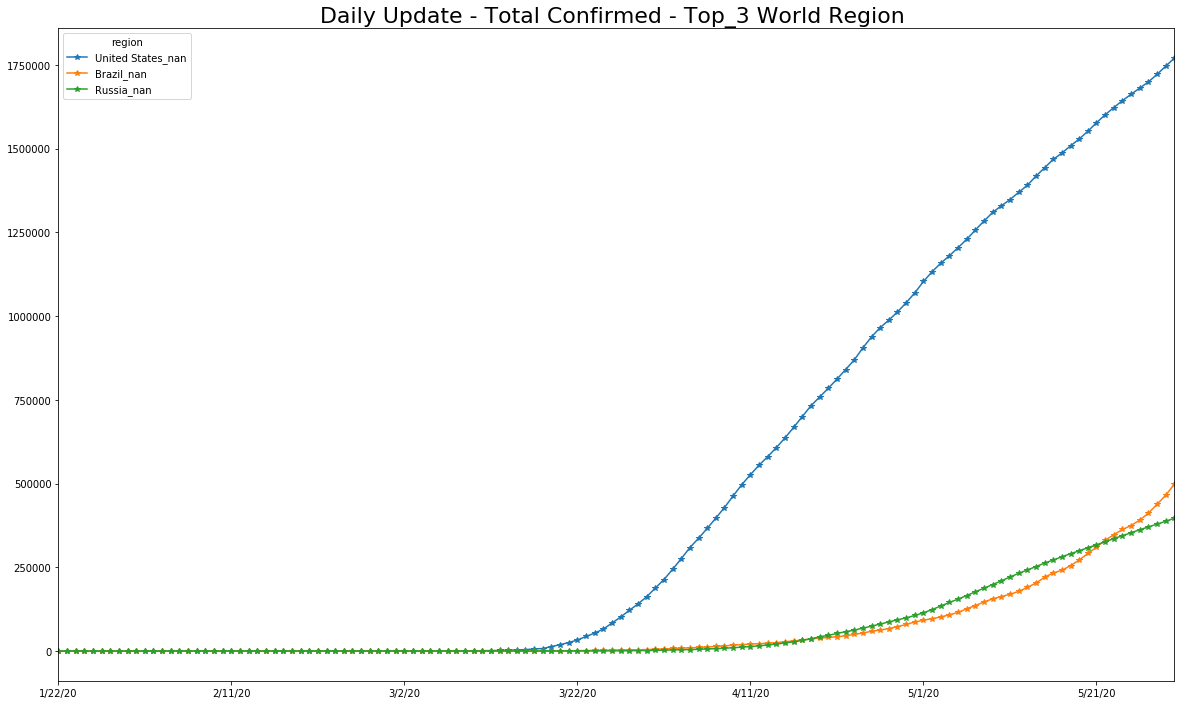

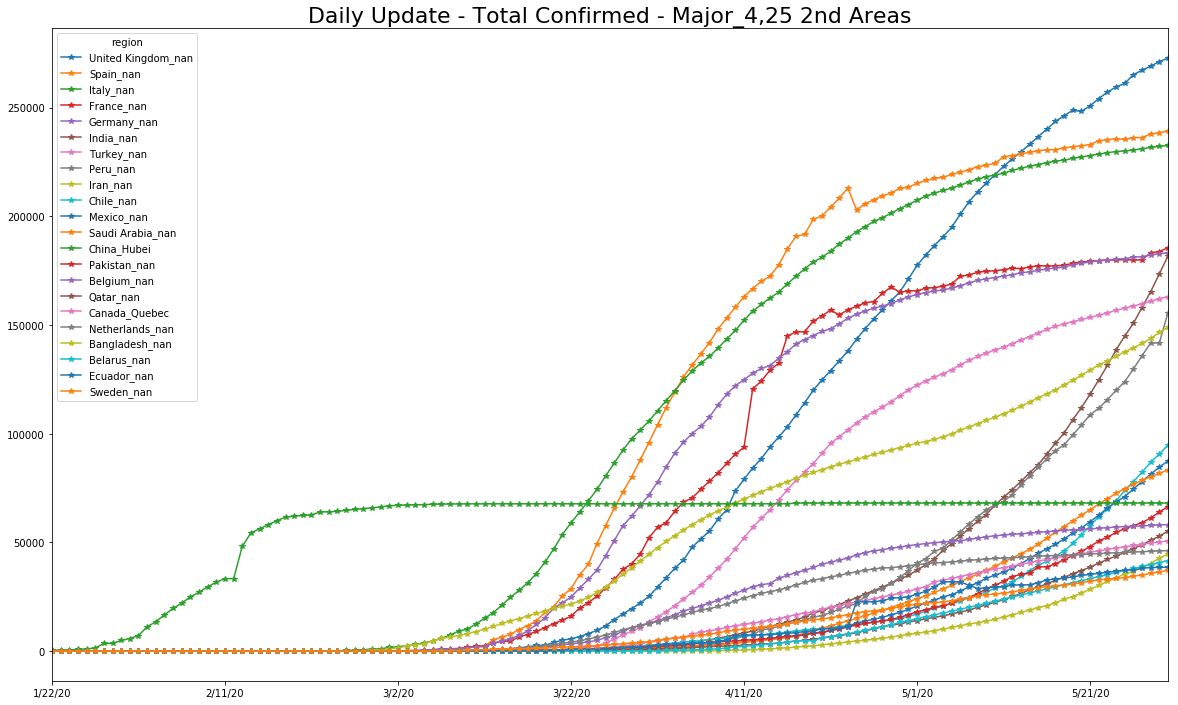

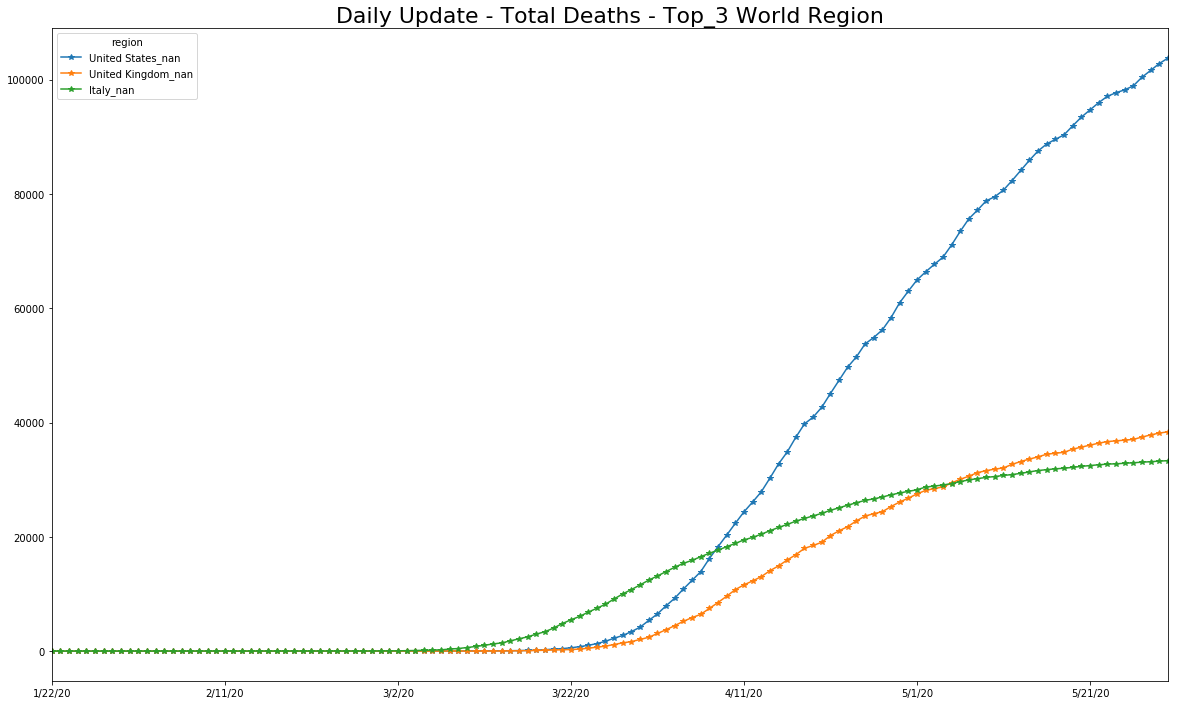

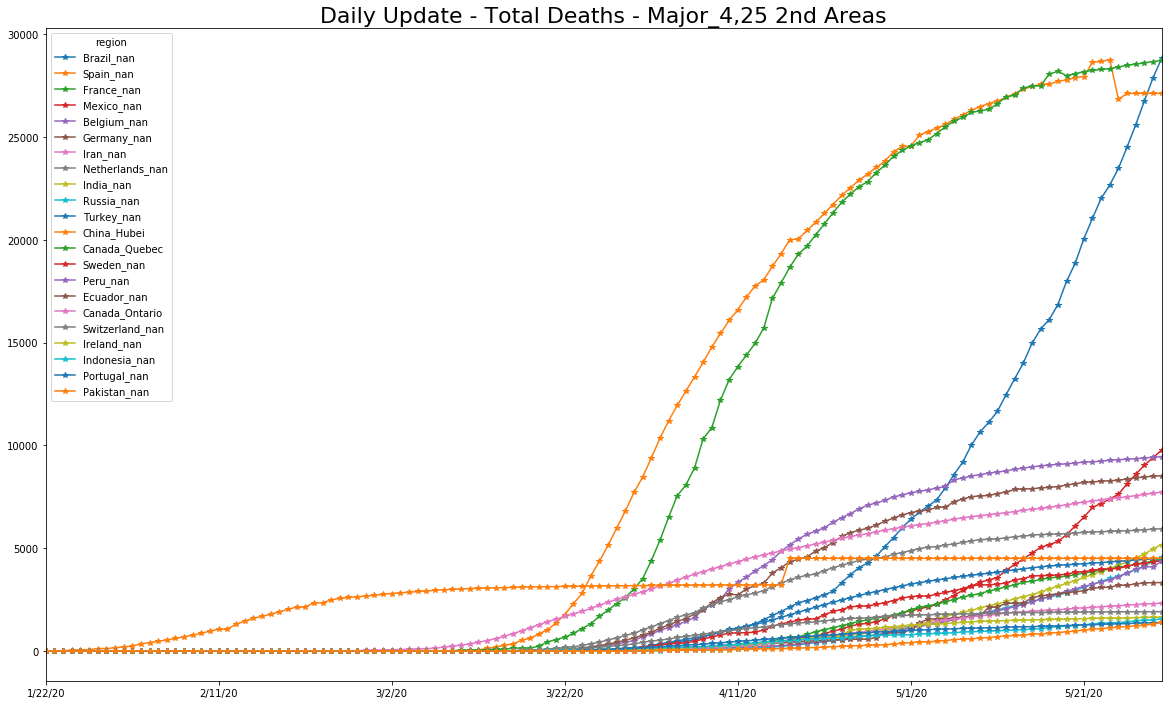

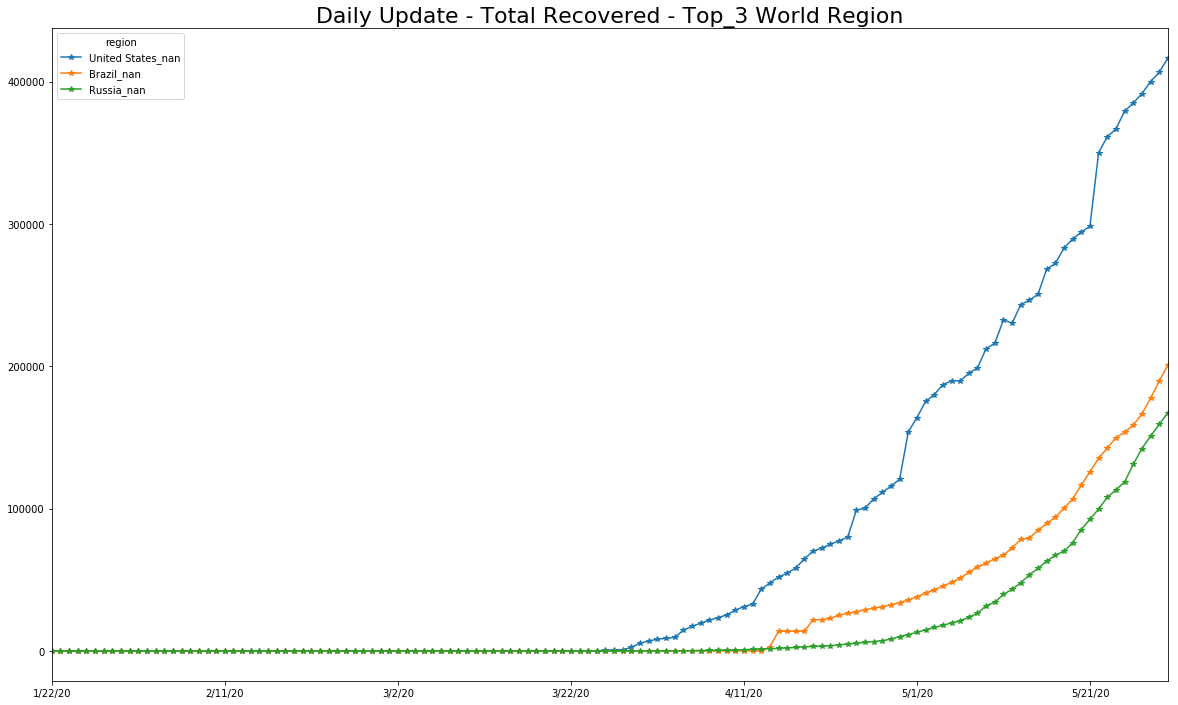

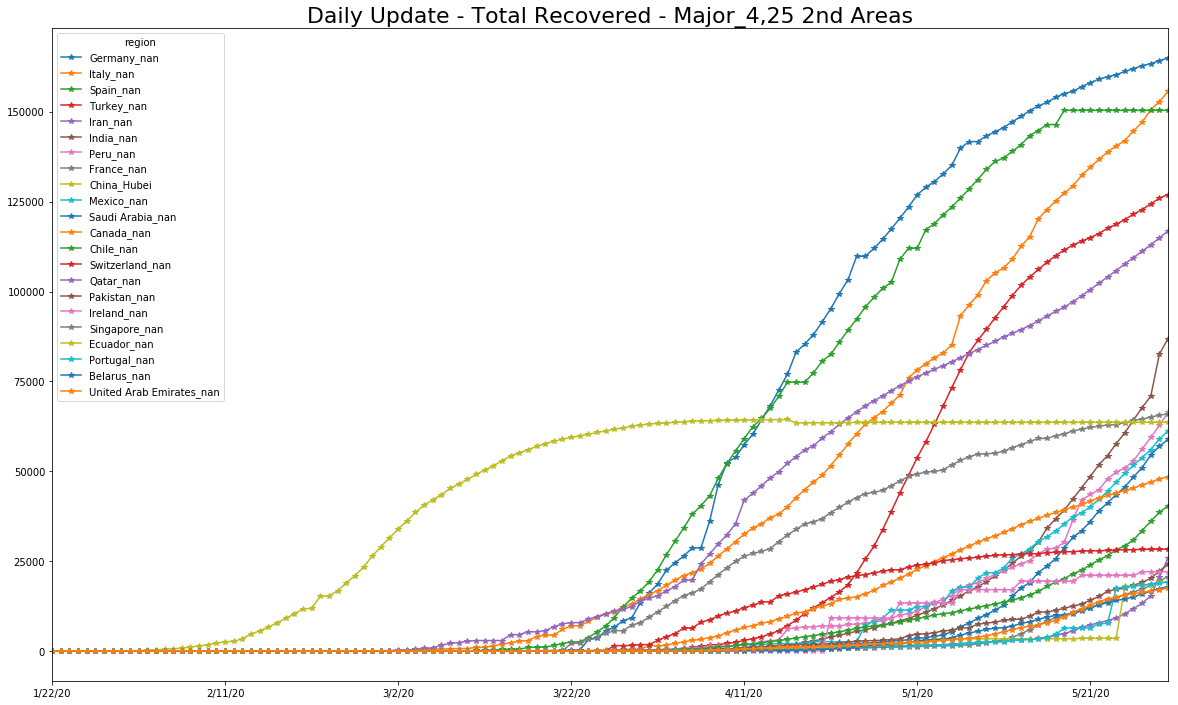

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/05/31


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [22]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 26/02 as
### they are too in the Past and model no longuer trains in China Hubei only!

ts=ts[35:]
ts_d=ts_d[35:]
ts_rec=ts_rec[35:]

In [23]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/26/20                1            0            1            0           0   
2/27/20                1            0            1            0           0   
2/28/20                1            0            1            0           0   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/26/20                        0              0            0   
2/27/20                        0              0            0   
2/28/20                        0              0            0   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
2/26/20                                       0                          4   
2/27/20                                       0                          4   
2/28/20                                       0                          4   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
2/26/20  ...                 57            0               0              0   
2/27/20  ...                 58            0               0              0   
2/28/20  ...                 60            0               0              0   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
2/26/20           16                       0                   0          0   
2/27/20           16                       0                   0          0   
2/28/20           16                       0                   0          0   

region   Zambia_nan  Zimbabwe_nan  
2/26/20           0             0  
2/27/20           0             0  
2/28/20           0             0  

[3 rows x 266 columns]

In [24]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
5/27/20            12456         1050         8857          763          71   
5/28/20            13036         1076         8997          763          74   
5/29/20            13659         1099         9134          764          81   
5/30/20            14525         1122         9267          764          84   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
5/27/20                       25          13933         7774   
5/28/20                       25          14702         8216   
5/29/20                       25          15419         8676   
5/30/20                       25          16214         8927   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
5/27/20                                     107                       3090   
5/28/20                                     107                       3092   
5/29/20                                     107                       3092   
5/30/20                                     107                       3095   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
5/27/20  ...            1699176          803            3369           1245   
5/28/20  ...            1721753          811            3444           1325   
5/29/20  ...            1746019          816            3468           1370   
5/30/20  ...            1770165          821            3546           1459   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
5/27/20          327                     434                   9        256   
5/28/20          327                     446                   9        278   
5/29/20          328                     446                   9        283   
5/30/20          328                     447                   9        310   

region   Zambia_nan  Zimbabwe_nan  
5/27/20        1057           132  
5/28/20        1057           149  
5/29/20        1057           149  
5/30/20        1057           174  

[4 rows x 266 columns]

In [25]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [26]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-02-27  Afghanistan_nan          1             0             0   
2     2020-02-28  Afghanistan_nan          1             0             0   
3     2020-02-29  Afghanistan_nan          1             0             0   
4     2020-03-01  Afghanistan_nan          1             0             0   
5     2020-03-02  Afghanistan_nan          1             0             0   
6     2020-03-03  Afghanistan_nan          1             0             0   
7     2020-03-04  Afghanistan_nan          1             0             0   
8     2020-03-05  Afghanistan_nan          1             0             0   
9     2020-03-06  Afghanistan_nan          1             0             0   
10    2020-03-07  Afghanistan_nan          1             0             0   
11    2020-03-08  Afghanistan_nan          4             0             0   
12    2020-03-09  Afghanistan_nan          4             3             3   
13    2020-03-10  Afghanistan_nan          5             0             3   
14    2020-03-11  Afghanistan_nan          7             1             4   
15    2020-03-12  Afghanistan_nan          7             2             3   
16    2020-03-13  Afghanistan_nan          7             0             3   
17    2020-03-14  Afghanistan_nan         11             0             2   
18    2020-03-15  Afghanistan_nan         16             4             4   
19    2020-03-16  Afghanistan_nan         21             5             9   
20    2020-03-17  Afghanistan_nan         22             5            14   
21    2020-03-18  Afghanistan_nan         22             1            11   
22    2020-03-19  Afghanistan_nan         22             0             6   
23    2020-03-20  Afghanistan_nan         24             0             1   
24    2020-03-21  Afghanistan_nan         24             2             2   
25    2020-03-22  Afghanistan_nan         40             0             2   
26    2020-03-23  Afghanistan_nan         40            16            18   
27    2020-03-24  Afghanistan_nan         74             0            16   
28    2020-03-25  Afghanistan_nan         84            34            50   
29    2020-03-26  Afghanistan_nan         94            10            44   
30    2020-03-27  Afghanistan_nan        110            10            54   
...          ...              ...        ...           ...           ...   
25698 2020-05-02     Zimbabwe_nan         34             0             8   
25699 2020-05-03     Zimbabwe_nan         34            -6             2   
25700 2020-05-04     Zimbabwe_nan         34             0            -6   
25701 2020-05-05     Zimbabwe_nan         34             0            -6   
25702 2020-05-06     Zimbabwe_nan         34             0             0   
25703 2020-05-07     Zimbabwe_nan         34             0             0   
25704 2020-05-08     Zimbabwe_nan         34             0             0   
25705 2020-05-09     Zimbabwe_nan         35             0             0   
25706 2020-05-10     Zimbabwe_nan         36             1             1   
25707 2020-05-11     Zimbabwe_nan         36             1             2   
25708 2020-05-12     Zimbabwe_nan         36             0             2   
25709 2020-05-13     Zimbabwe_nan         37             0             1   
25710 2020-05-14     Zimbabwe_nan         37             1             1   
25711 2020-05-15     Zimbabwe_nan         42             0             1   
25712 2020-05-16     Zimbabwe_nan         42             5             6   
25713 2020-05-17     Zimbabwe_nan         44             0             5   
25714 2020-05-18     Zimbabwe_nan         46             2             7   
25715 2020-05-19     Zimbabwe_nan         46             2             4   
25716 2020-05-20     Zimbabwe_nan         48             0             4   
25717 2020-05-21     Zimbabwe_nan         51             2             4   
25718 2020-05-22     Zimbabwe_nan         51             3  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
25727 2020-05-31  Zimbabwe_nan          0            25            42   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
25727           118         116.785235         131.825758         310.732143   

       last_day  kalman_prediction  population  infected_rate  min  max  
25727       174              190.0    10000000   1.750000e-07  NaN  NaN

In [39]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="Shared -- Ratio in Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage_infected_rate_confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage_factor_9.8_10_infected_rate_confirmed']=ratiod['infected_rate']*100*9.8
ratiod['delta_new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta_new_cases_per_1M_hab']=ratiod['delta_new_cases']/ratiod['population']*1000000

ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)

ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
25725  2020-05-29  Zimbabwe_nan        149            17            93   
25726  2020-05-30  Zimbabwe_nan        174             0            93   
25727  2020-05-31  Zimbabwe_nan          0            25            42   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
25725            98         112.886364         266.089286         292.176471   
25726            98         100.006711         266.089286         292.176471   
25727           118         116.785235         131.825758         310.732143   

       last_day  kalman_prediction  population  infected_rate  min  max  \
25725       149              144.0    10000000   1.500000e-07  NaN  NaN   
25726       149              166.0    10000000   1.500000e-07  NaN  NaN   
25727       174              190.0    10000000   1.750000e-07  NaN  NaN   

       population_percentage_infected_rate_confirmed  \
25725                                       0.000015   
25726                                       0.000015   
25727                                       0.000017   

       population_percentage_factor_9.8_10_infected_rate_confirmed  \
25725                                           0.000147             
25726                                           0.000147             
25727                                           0.000171             

       delta_new_cases  delta_new_cases_per_1M_hab  
25725             -5.0                        -0.5  
25726             17.0                         1.7  
25727             16.0                         1.6

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse           mae
256  United States_nan  3.371543e+10  183617.62261  23269.442105


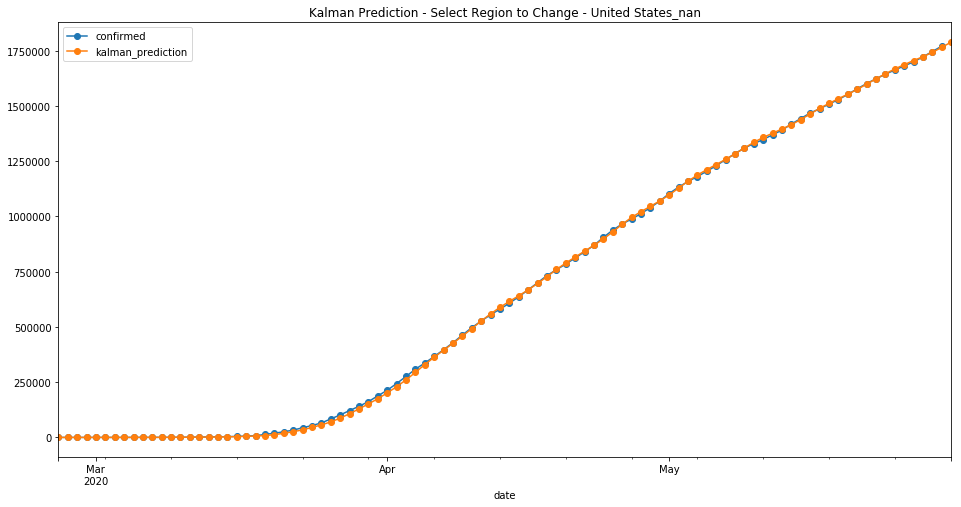

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse     mae
208  Russia_nan  1.730361e+09  41597.609712  5246.4


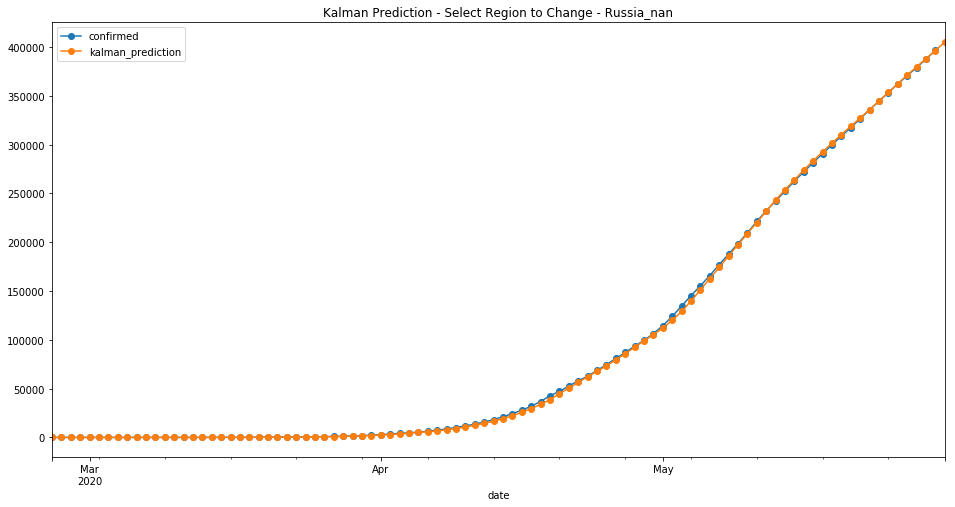

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse          mae
30  Brazil_nan  2.765257e+09  52585.714696  7432.463158


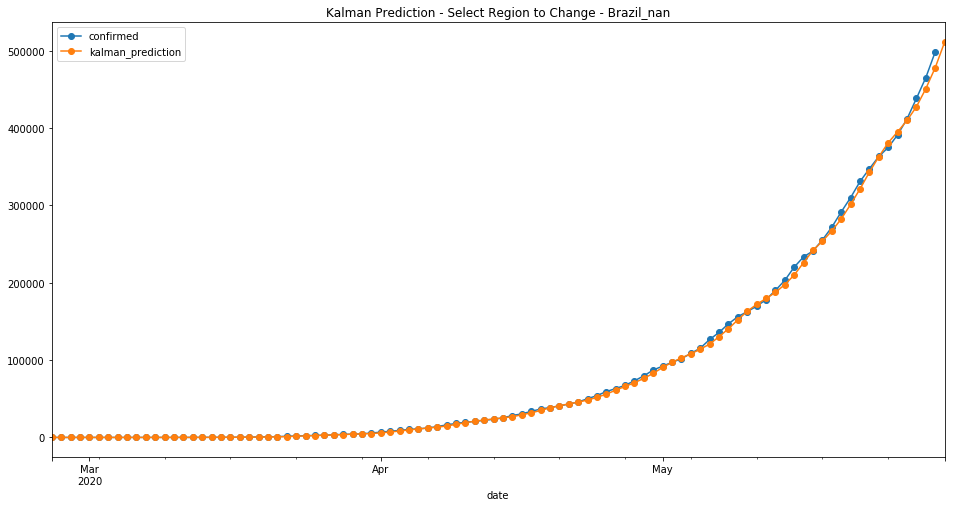

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse          mae
255  United Kingdom_nan  8.013805e+08  28308.665348  3805.915789


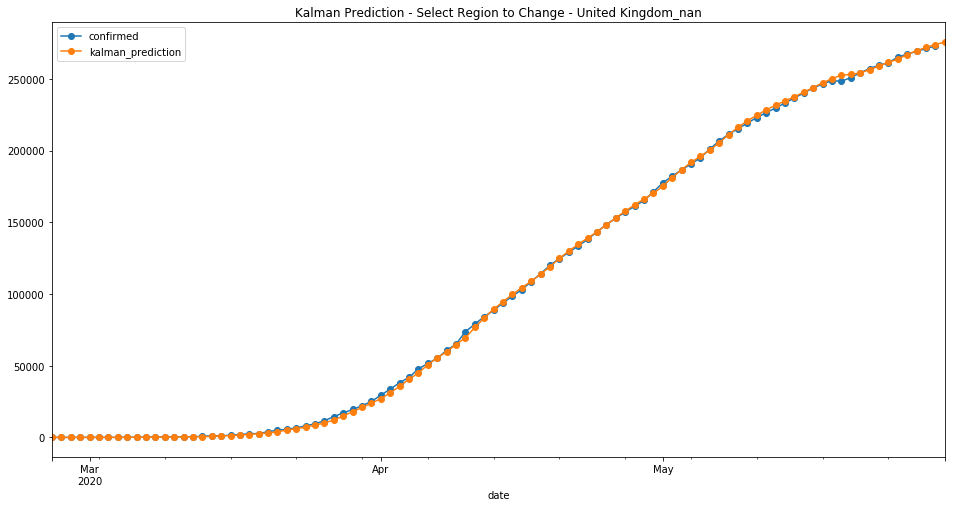

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpf36f9vrv
  JVM stdout: /tmp/tmpf36f9vrv/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpf36f9vrv/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 7 months and 4 days !!!
H2O cluster name:           H2O_from_python_unknownUser_e3uxca
H2O cluster total nodes:    1
H2O cluster free memory:    3 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-42)).strftime('%Y-%m-%d') # 7 weeks =42 days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-04-19
last_train_date= 2020-05-30
first_bootstrap_date= 2020-05-22
boost_bootstrap_date= 2020-05-27
first_test_date= 2020-05-21
last_test_date= 2020-05-31
first_valid_date= 2020-05-29


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0    9183.0       9216 2020-05-22  Afghanistan_nan
1    9753.0       9998 2020-05-23  Afghanistan_nan
2   10706.0      10582 2020-05-24  Afghanistan_nan
3   11137.0      11173 2020-05-25  Afghanistan_nan
4   11779.0      11831 2020-05-26  Afghanistan_nan
5   12516.0      12456 2020-05-27  Afghanistan_nan
6   13124.0      13036 2020-05-28  Afghanistan_nan
7   13684.0      13659 2020-05-29  Afghanistan_nan
8   14339.0      14525 2020-05-30  Afghanistan_nan
9   15376.0          0 2020-05-31  Afghanistan_nan
10    977.0        981 2020-05-22      Albania_nan
11    995.0        989 2020-05-23      Albania_nan
12   1000.0        998 2020-05-24      Albania_nan
13   1010.0       1004 2020-05-25      Albania_nan
14   1014.0       1029 2020-05-26      Albania_nan
15   1049.0       1050 2020-05-27      Albania_nan
16   1066.0       1076 2020-05-28      Albania_nan
17   1097.0       1099 2020-05-29      Albania_nan
18   1120.0       1122 2020-05-30      Albania_nan
19   1144.0          0 2020-05-31      Albania_nan
20   7962.0       7918 2020-05-22      Algeria_nan
21   8150.0       8113 2020-05-23      Algeria_nan
22   8346.0       8306 2020-05-24      Algeria_nan
23   8539.0       8503 2020-05-25      Algeria_nan
24   8739.0       8697 2020-05-26      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175  4537.0       4568 2020-05-27  Azerbaijan_nan
176  4727.0       4759 2020-05-28  Azerbaijan_nan
177  4932.0       4989 2020-05-29  Azerbaijan_nan
178  5185.0       5246 2020-05-30  Azerbaijan_nan
179  5461.0          0 2020-05-31  Azerbaijan_nan
180   101.0         97 2020-05-22     Bahamas_nan
181   101.0        100 2020-05-23     Bahamas_nan
182   105.0        100 2020-05-24     Bahamas_nan
183   104.0        100 2020-05-25     Bahamas_nan
184   104.0        100 2020-05-26     Bahamas_nan
185   104.0        100 2020-05-27     Bahamas_nan
186   104.0        101 2020-05-28     Bahamas_nan
187   105.0        102 2020-05-29     Bahamas_nan
188   106.0        102 2020-05-30     Bahamas_nan
189   107.0          0 2020-05-31     Bahamas_nan
190  8486.0       8414 2020-05-22     Bahrain_nan
191  8722.0       8802 2020-05-23     Bahrain_nan
192  9201.0       9138 2020-05-24     Bahrain_nan
193  9478.0       9171 2020-05-25     Bahrain_nan
194  9319.0       9366 2020-05-26     Bahrain_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date       region
220  34349.0      34303 2020-05-22  Belarus_nan
221  35265.0      35244 2020-05-23  Belarus_nan
222  36208.0      36198 2020-05-24  Belarus_nan
223  37169.0      37144 2020-05-25  Belarus_nan
224  38103.0      38059 2020-05-26  Belarus_nan
225  38999.0      38956 2020-05-27  Belarus_nan
226  39885.0      39858 2020-05-28  Belarus_nan
227  40790.0      40764 2020-05-29  Belarus_nan
228  41693.0      41658 2020-05-30  Belarus_nan
229  42572.0          0 2020-05-31  Belarus_nan
230  56460.0      56511 2020-05-22  Belgium_nan
231  56738.0      56810 2020-05-23  Belgium_nan
232  57044.0      57092 2020-05-24  Belgium_nan
233  57309.0      57342 2020-05-25  Belgium_nan
234  57544.0      57455 2020-05-26  Belgium_nan
235  57575.0      57592 2020-05-27  Belgium_nan
236  57737.0      57849 2020-05-28  Belgium_nan
237  58059.0      58061 2020-05-29  Belgium_nan
238  58216.0      58186 2020-05-30  Belgium_nan
239  58288.0          0 2020-05-31  Belgium_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data',model_v2.r2(valid=True))

# MSE on the training data =  6062724.059069801
# MSE on the validation data =  35019653274.07703
# R^2 on the training data =  0.9998242462328766
# R^2 on the validation data 0.4601499037436343


In [53]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1590949913117_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 6062724.059069801
RMSE: 2462.259949532096
MAE: 488.0940583651672
RMSLE: 0.45721960086425584
Mean Residual Deviance: 6062724.059069801

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 35019653274.07703
RMSE: 187135.38755157194
MAE: 45774.22584596891
RMSLE: 5.942992115265251
Mean Residual Deviance: 35019653274.07703
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2020-05-31 18:32:00  0.079 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2020-05-31 18:32:00  0.460 sec   1.0                14755.145507949728  2334.701658954512   217714318.96076906   181342.76795097452  45834.58496849424   32885199488.12099
     2020-05-31 18:32:00  0.583 sec   2.0                9073.507517963228   1590.4528636866307  82328538.67853521    186353.22711927758  46160.77613103957   34727525257.76905
     2020-05-31 18:32:00  0.688 sec   3.0                14821.256059832736  2073.3064285517644  219669631.1911286    187491.95543404686  48550.180195096924  35153233352.48261
     2020-05-31 18:32:01  0.921 sec   4.0                14690.598903144979  2109.3538345785414  215813696.13308448   186571.48152804887  47208.685823594955  34808917719.571075
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2020-05-31 18:32:04  4.084 sec   45.0               3518.592079165714   710.4266637656145   12380490.219567701   187928.2825852564   45738.009167901095  35317039395.443985
     2020-05-31 18:32:08  8.129 sec   144.0              2745.927220129601   550.758755578689    7540116.298248678    187384.3736066618   45796.65781807093   35112903471.961006
     2020-05-31 18:32:12  12.131 sec  264.0              2540.27843375891    505.66112007540914  6453014.52102062     187251.05830657022  45834.975796016006  35062958836.930565
     2020-05-31 18:32:16  16.140 sec  391.0              2458.2216210659585  496.2891101202042   6042853.538276148    187168.28491746576  45776.578008723314  35031966878.94564
     2020-05-31 18:32:19  19.752 sec  500.0              2462.259949532096   488.0940583651672   6062724.059069801    187135.38755157194  45774.22584596891   35019653274.07703


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
last_day           2.0852e+16             1                    0.354912
kalman_prediction  1.48227e+16            0.710853             0.25229
7_day_change       9.85854e+15            0.472787             0.167798
3_day_change       5.21133e+15            0.24992              0.0886995
1_day_change       3.45566e+15            0.165723             0.0588172
region             2.08713e+15            0.100093             0.035524
infected_rate      1.42872e+15            0.0685173            0.0243176
1_day_change_rate  3.41513e+14            0.016378             0.00581273
7_day_change_rate  2.74949e+14            0.0131857            0.00467977
3_day_change_rate  2.43855e+14            0.0116946            0.00415053
max                1.12806e+14            0.00540983           0.00192001
min                6.34284e+13            0.00304184           0.00107958

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0            last_day         2.085198e+16           1.000000    0.354912
1   kalman_prediction         1.482270e+16           0.710853    0.252290
2        7_day_change         9.858542e+15           0.472787    0.167798
3        3_day_change         5.211330e+15           0.249920    0.088700
4        1_day_change         3.455662e+15           0.165723    0.058817
5              region         2.087129e+15           0.100093    0.035524
6       infected_rate         1.428721e+15           0.068517    0.024318
7   1_day_change_rate         3.415133e+14           0.016378    0.005813
8   7_day_change_rate         2.749485e+14           0.013186    0.004680
9   3_day_change_rate         2.438547e+14           0.011695    0.004151
10                max         1.128057e+14           0.005410    0.001920
11                min         6.342842e+13           0.003042    0.001080

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


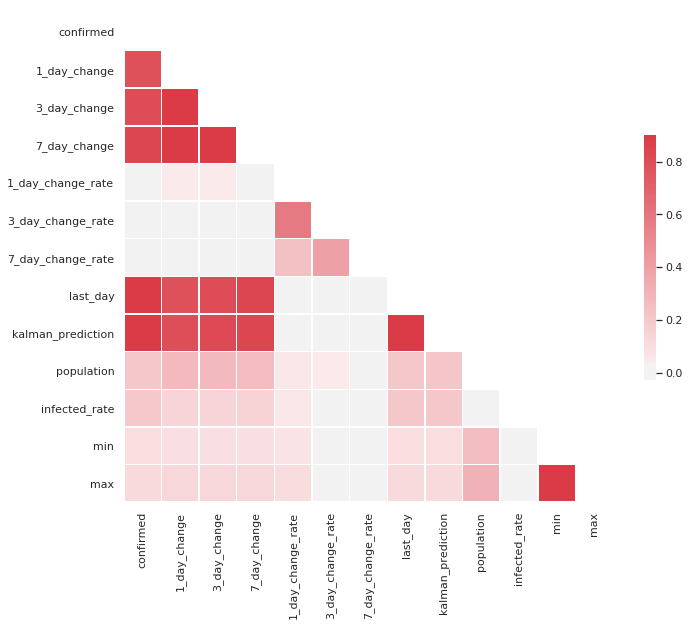

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.787821
3_day_change         0.808084
7_day_change         0.836415
1_day_change_rate    0.025763
3_day_change_rate   -0.001353
7_day_change_rate   -0.013367
last_day             0.978797
kalman_prediction    0.979281
population           0.210506
infected_rate        0.201764
min                  0.105177
max                  0.117486
Name: confirmed, dtype: float64


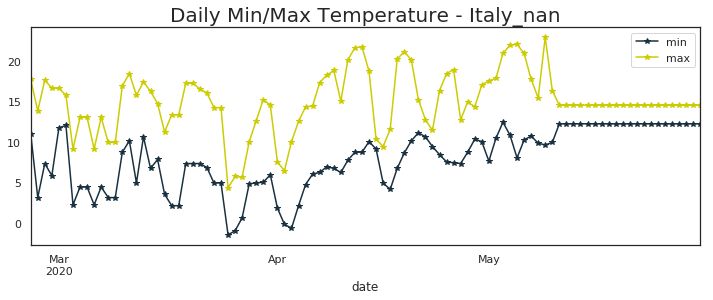

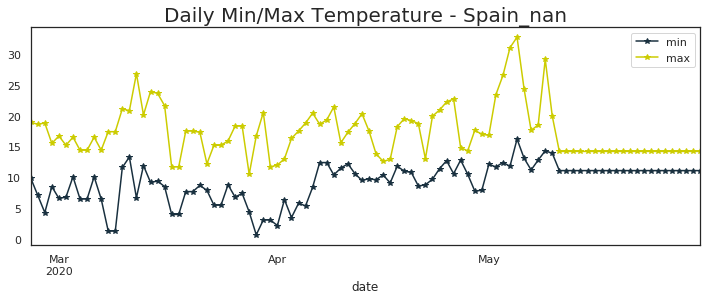

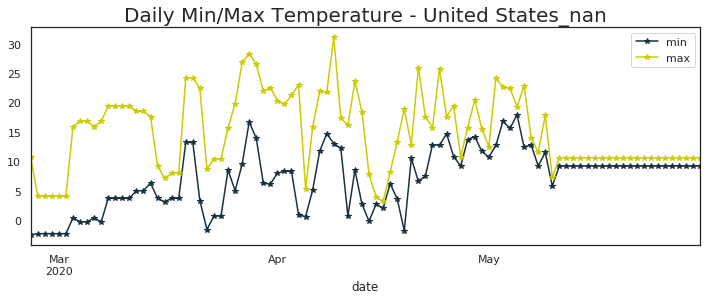

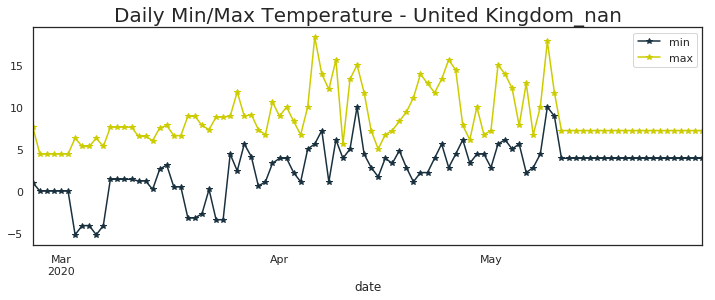

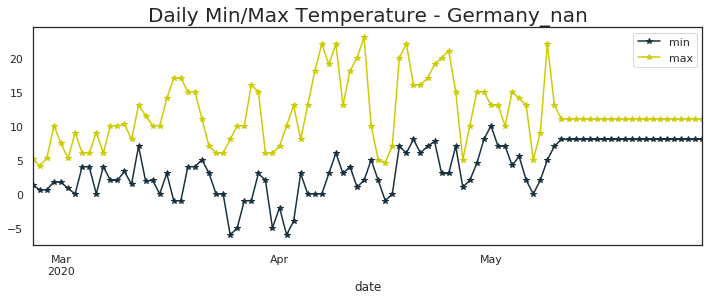

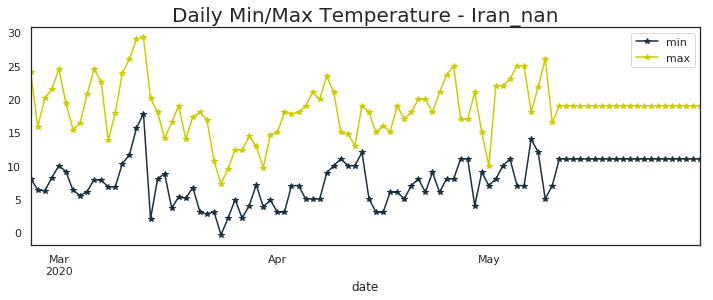

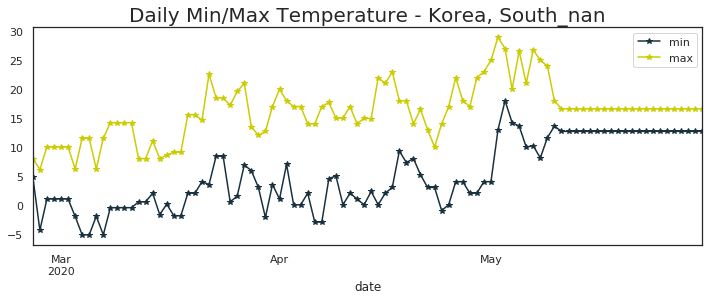

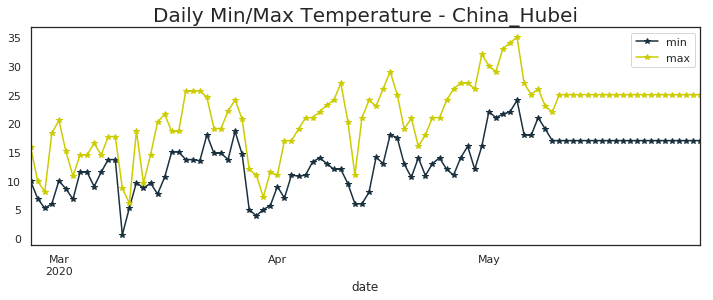

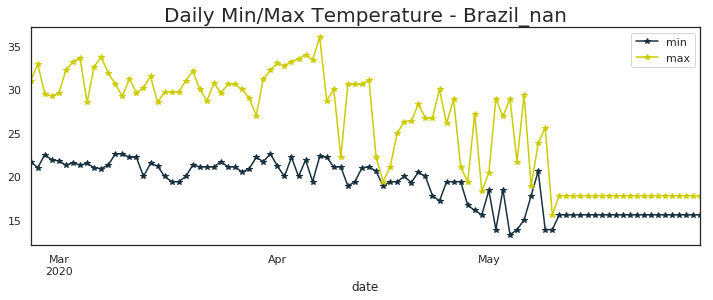

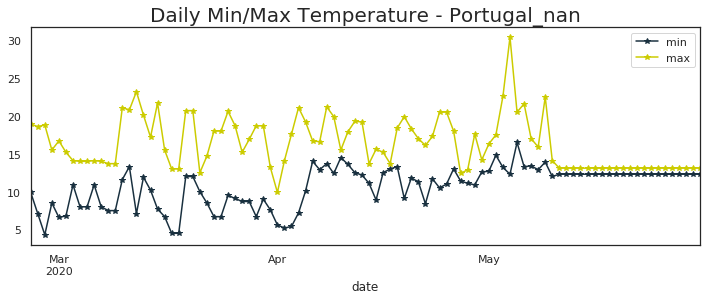

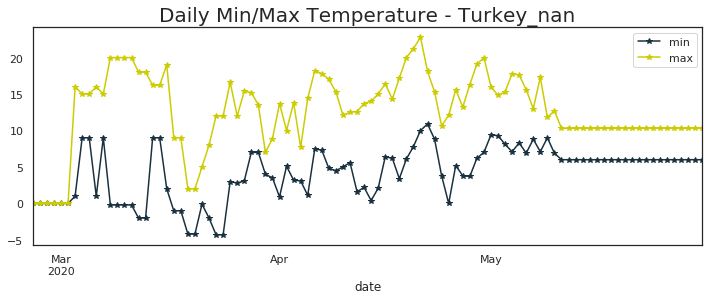

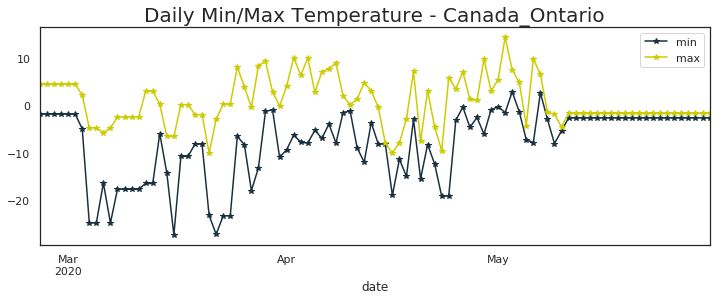

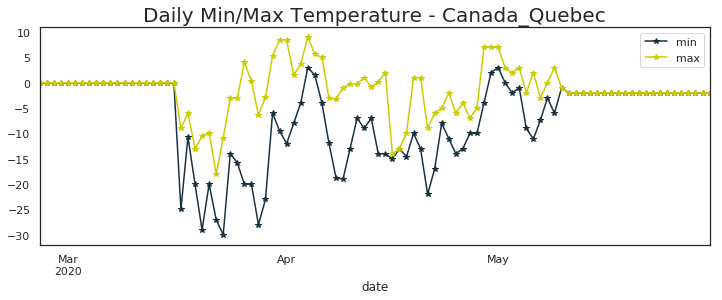

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.9  31.1
Brazil_nan                  22.6  36.0
Russia_nan                  13.0  30.0
United Kingdom_nan          10.0  18.3
Spain_nan                   16.2  32.7
Italy_nan                   12.4  22.9
France_nan                  14.2  23.8
Germany_nan                 10.0  23.0
India_nan                   30.0  43.0
Turkey_nan                  10.9  22.8
Peru_nan                     0.0   0.0
Iran_nan                    17.8  29.3
Chile_nan                    0.0   0.0
Mexico_nan                   0.0   0.0
Saudi Arabia_nan             0.0   0.0
China_Hubei                 24.0  35.0
Pakistan_nan                15.0  23.7
Belgium_nan                 17.8  26.1
Qatar_nan                    0.0   0.0
Canada_Quebec                3.0   9.0
Netherlands_nan             15.6  26.1
Bangladesh_nan               0.0   0.0
Belarus_nan                 

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

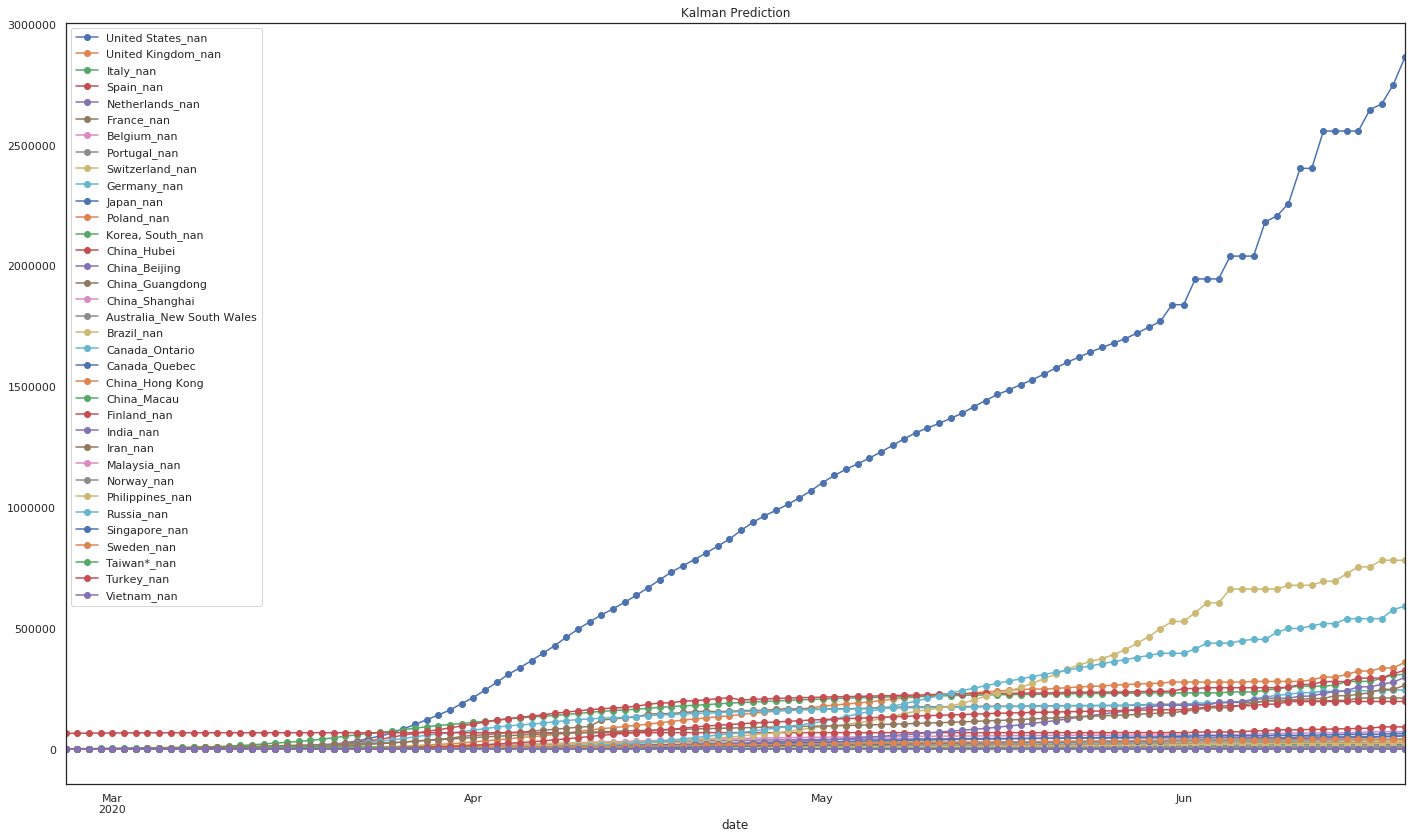

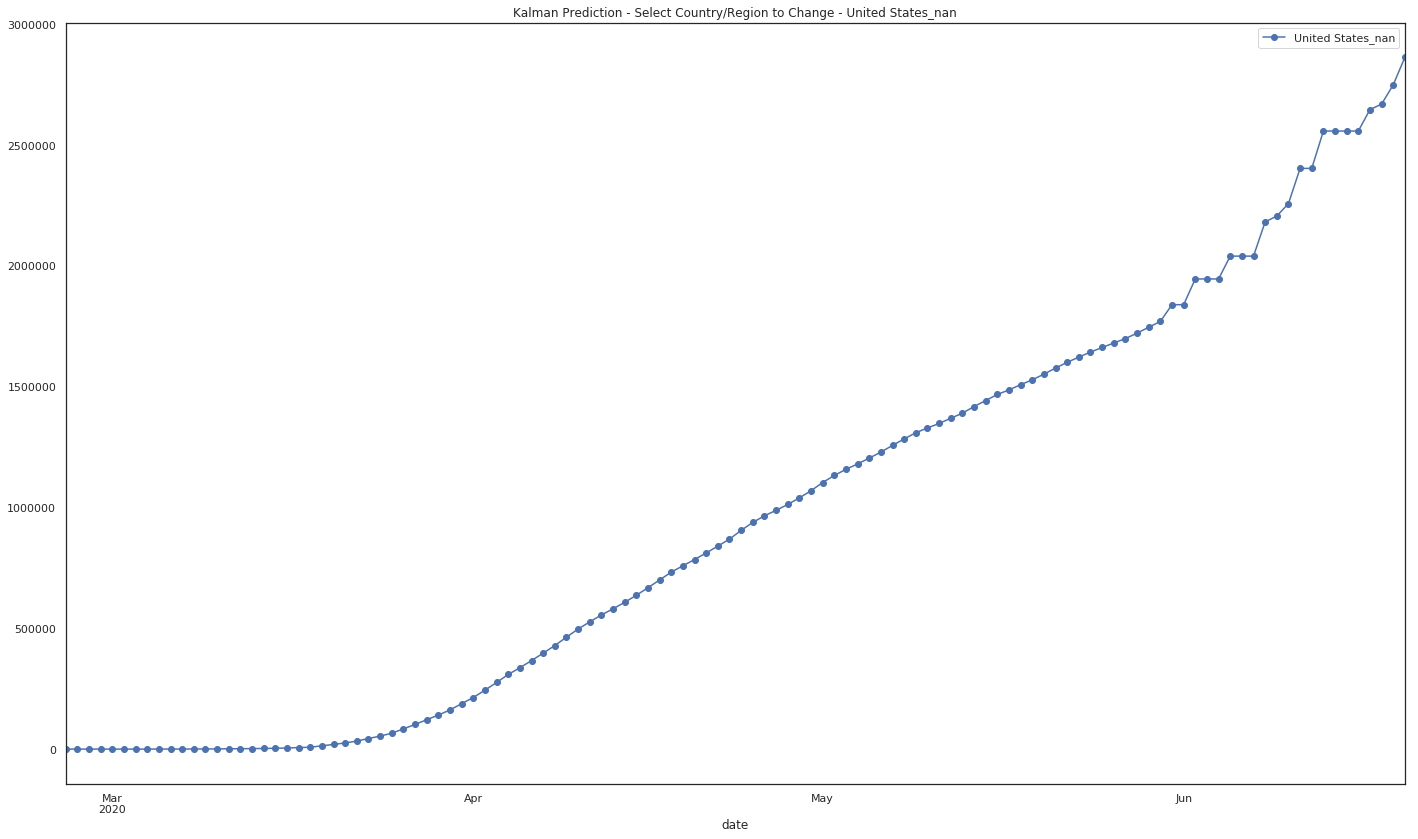

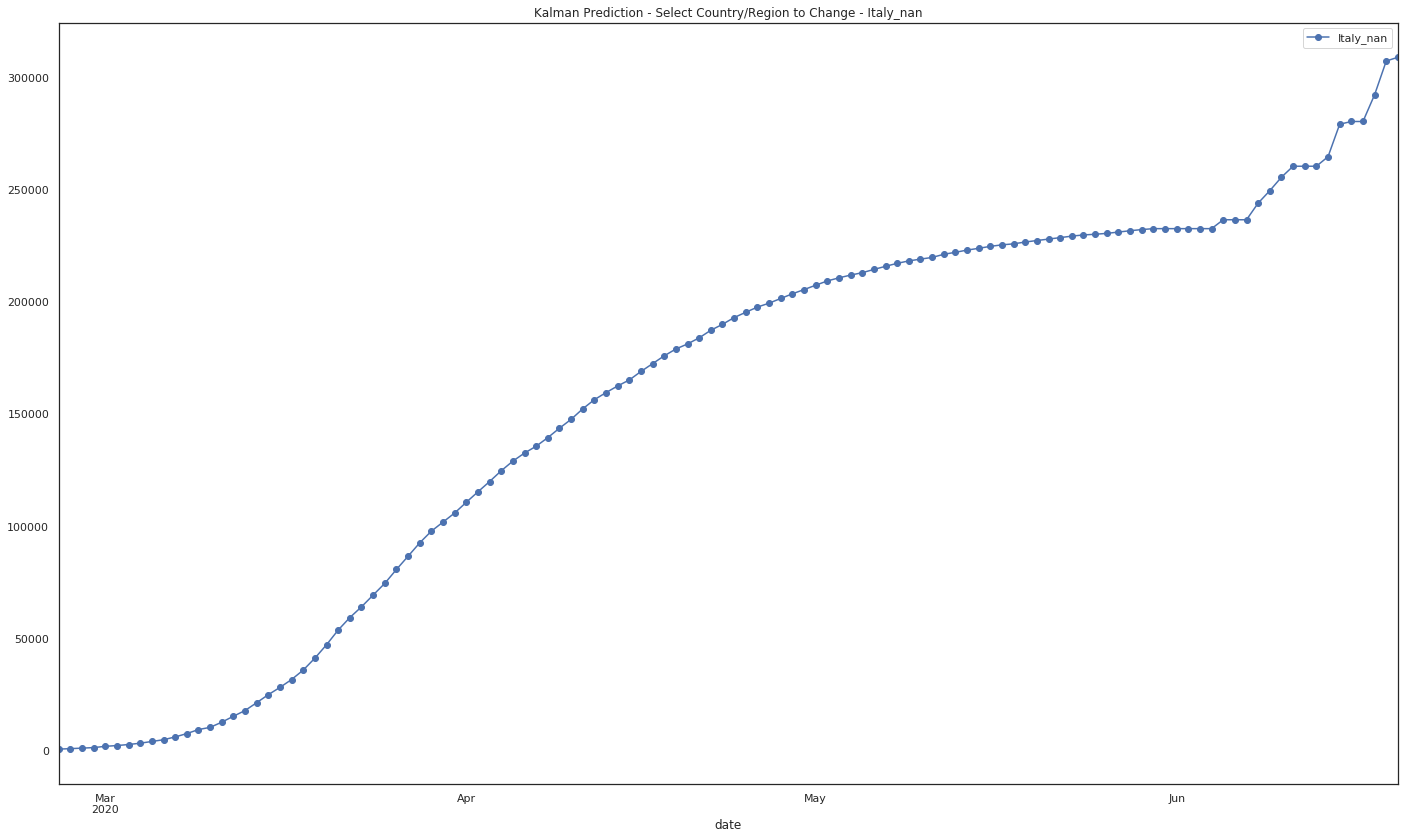

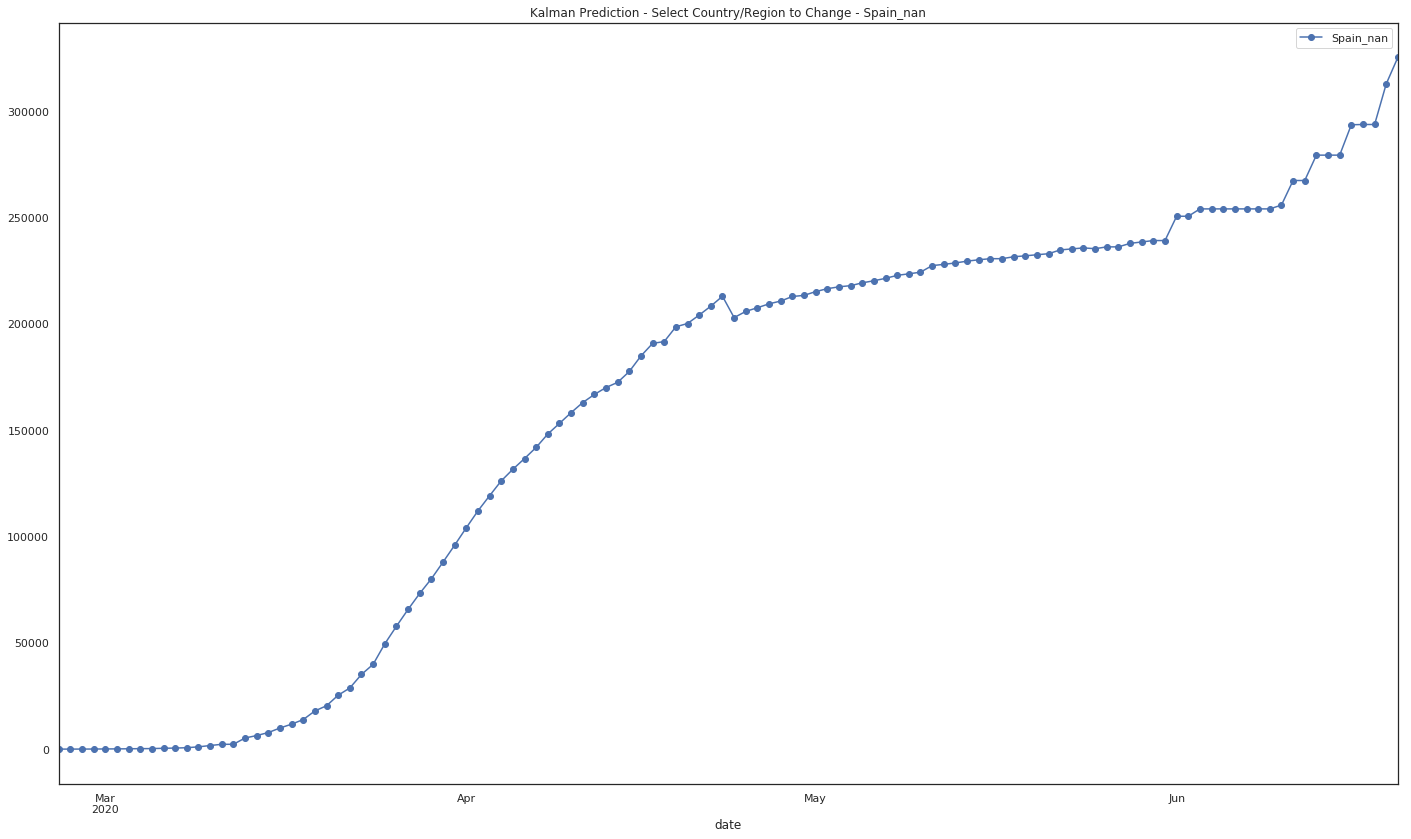

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


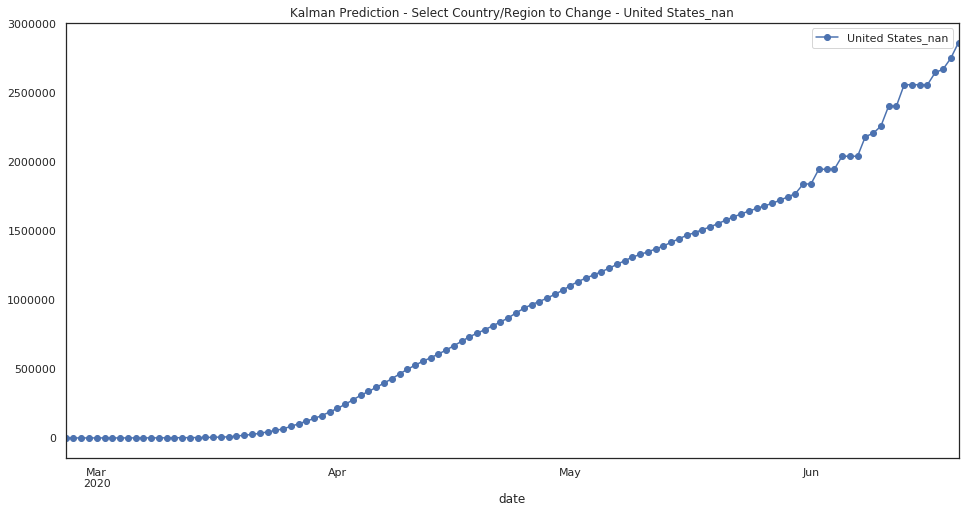

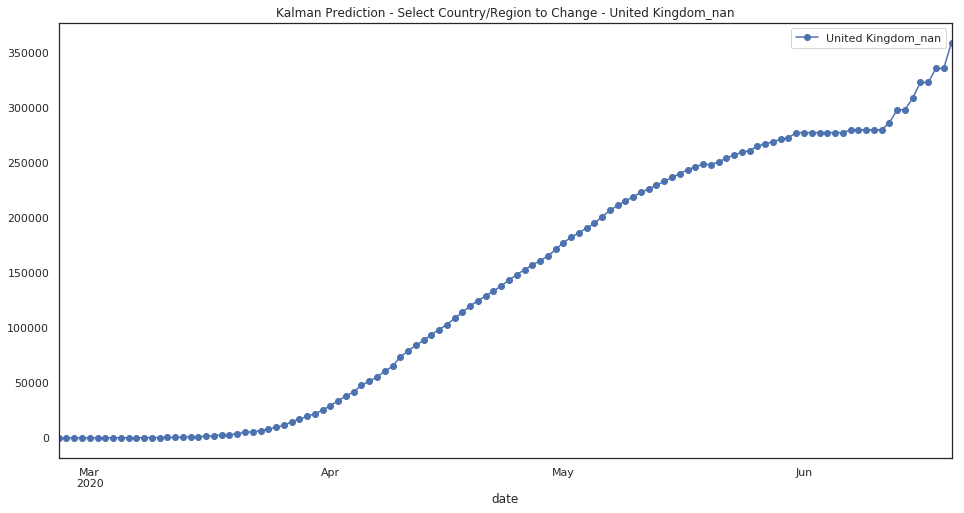

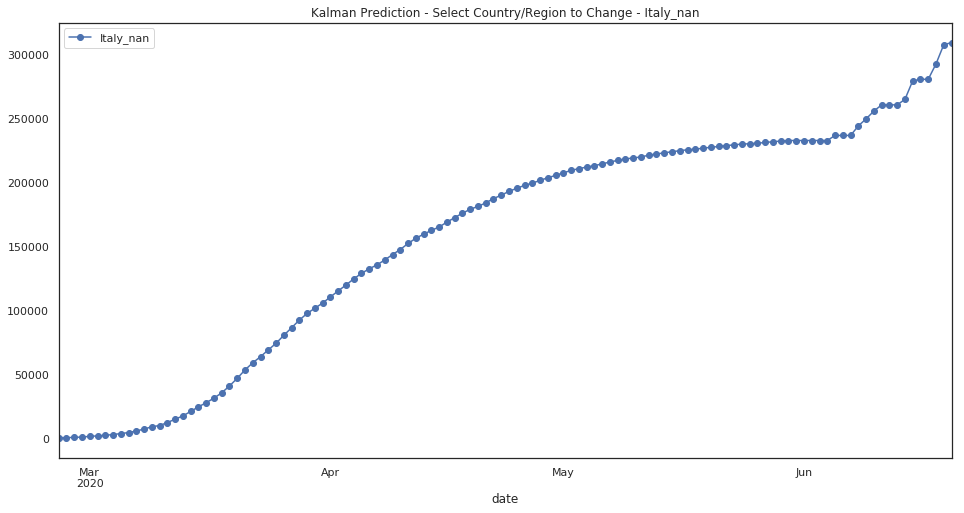

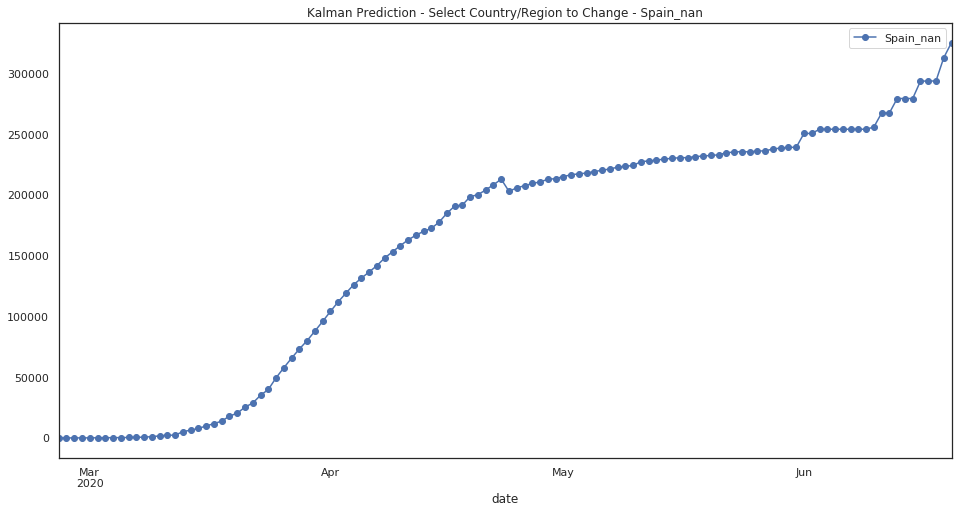

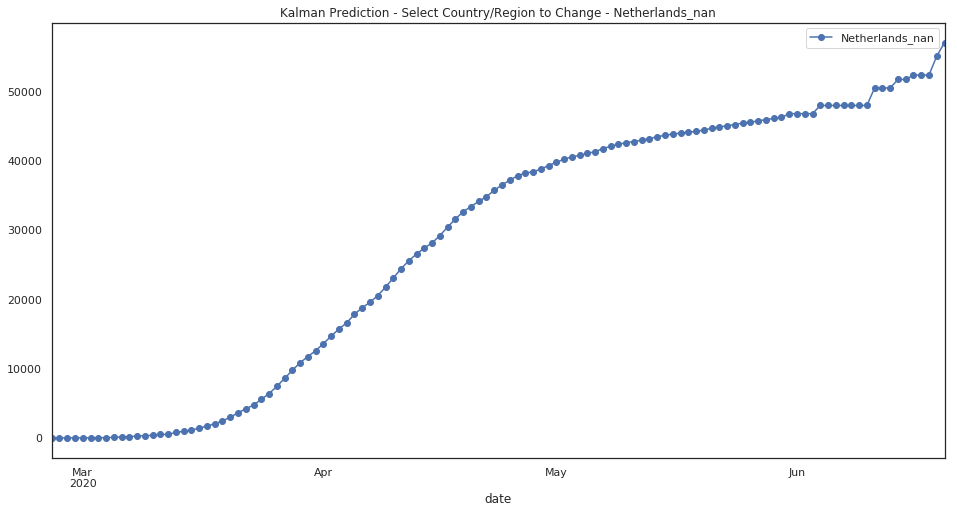

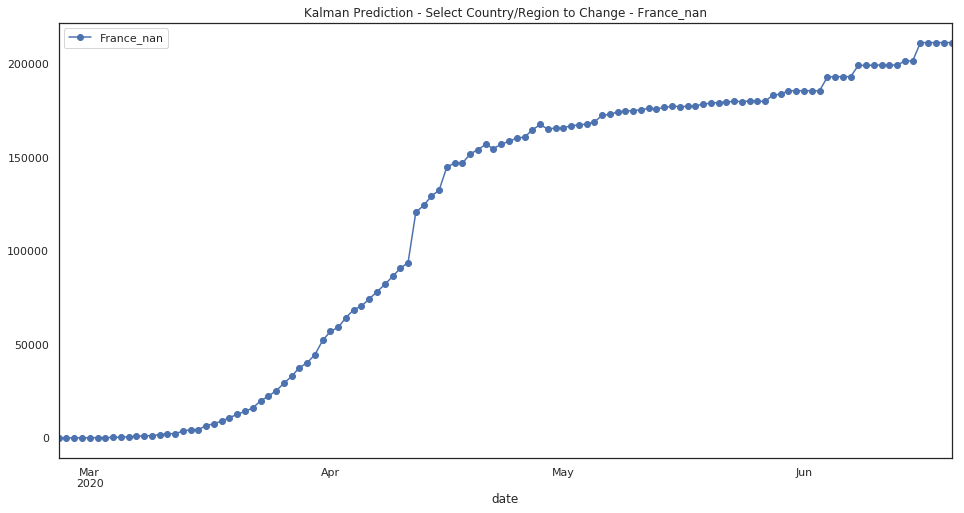

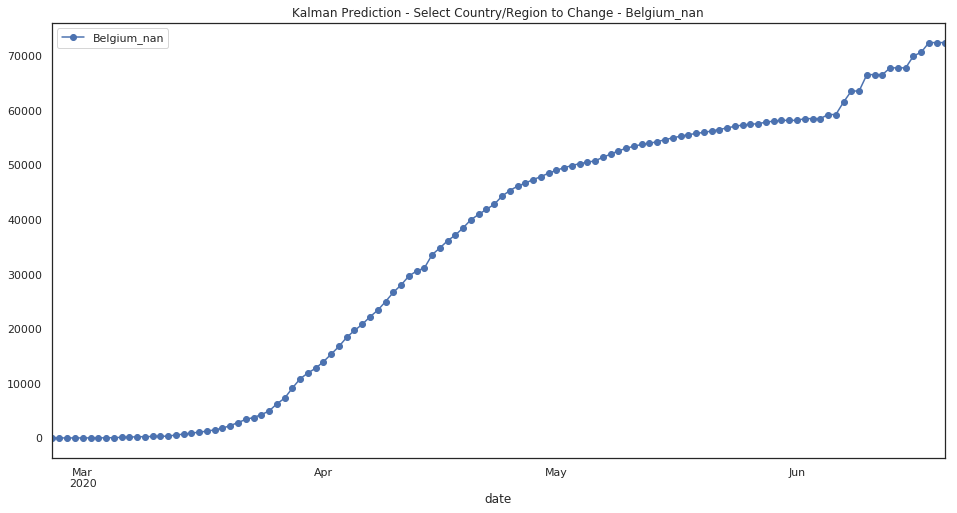

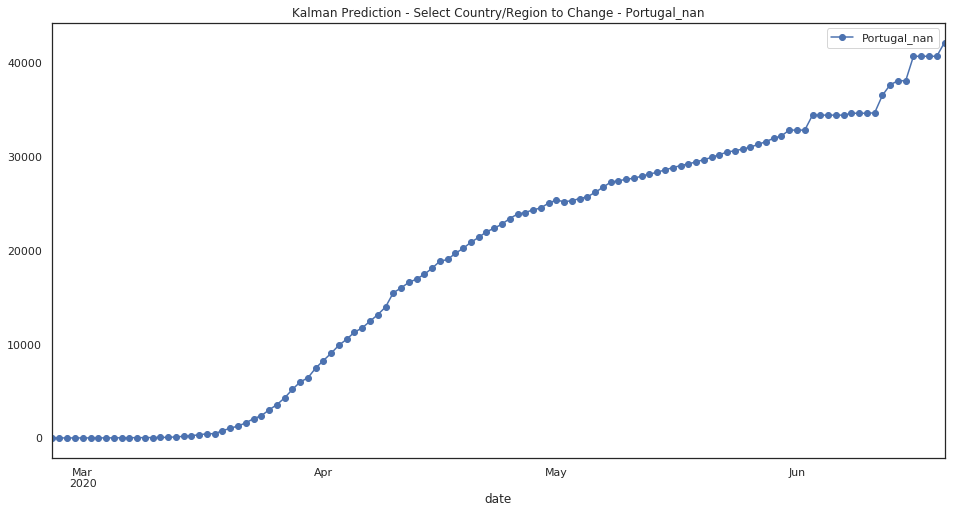

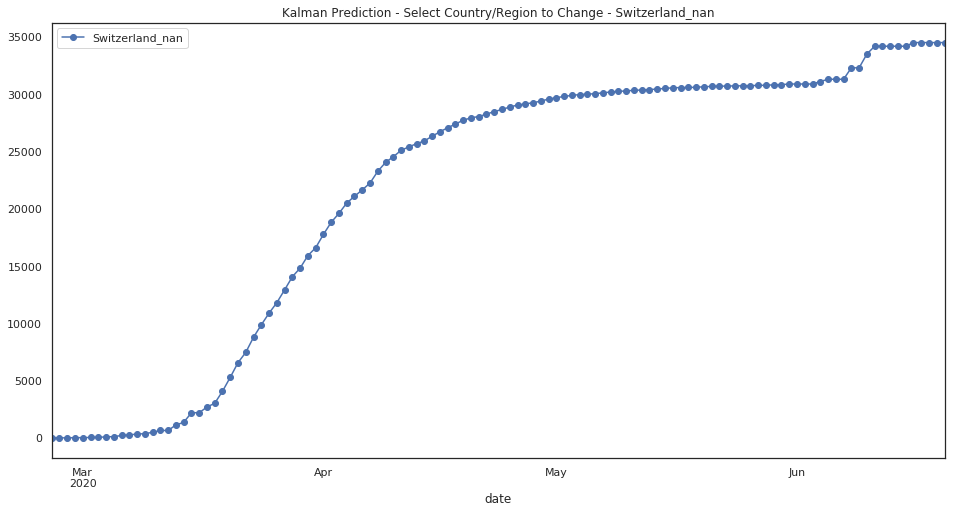

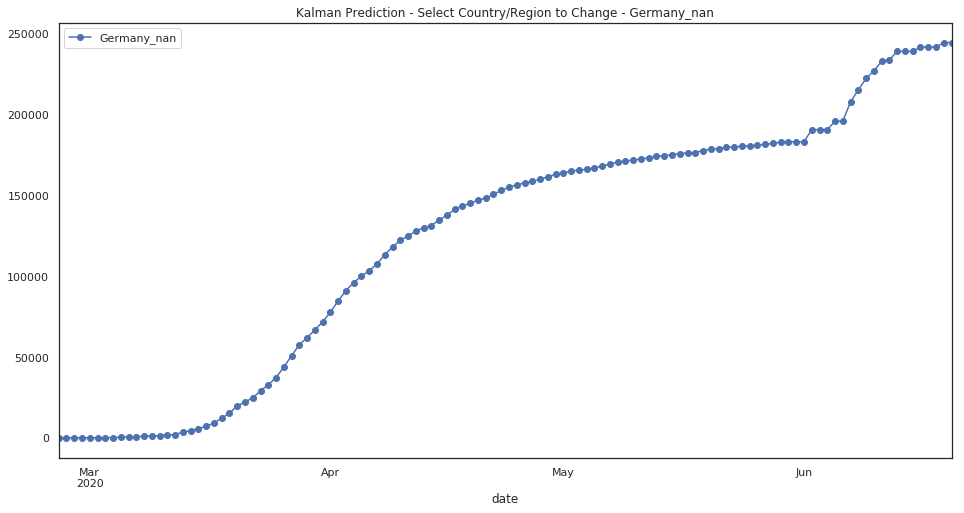

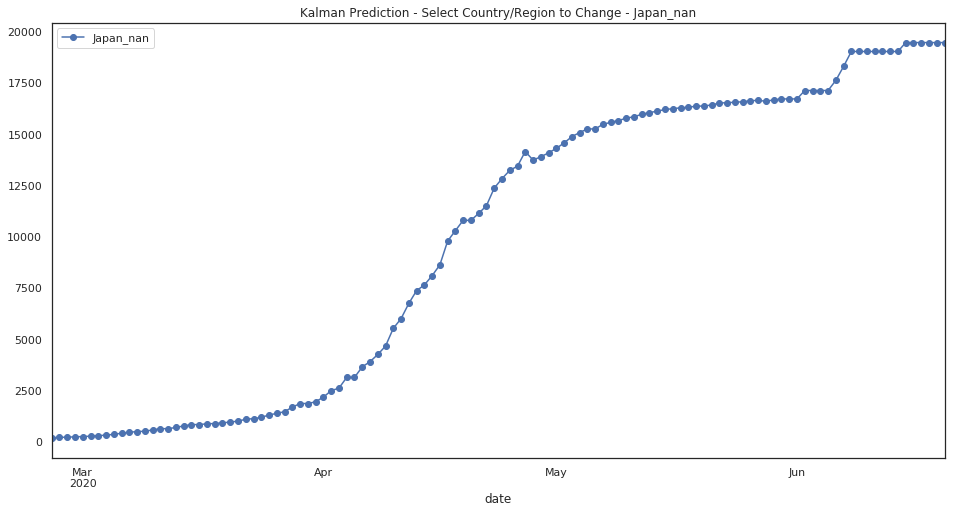

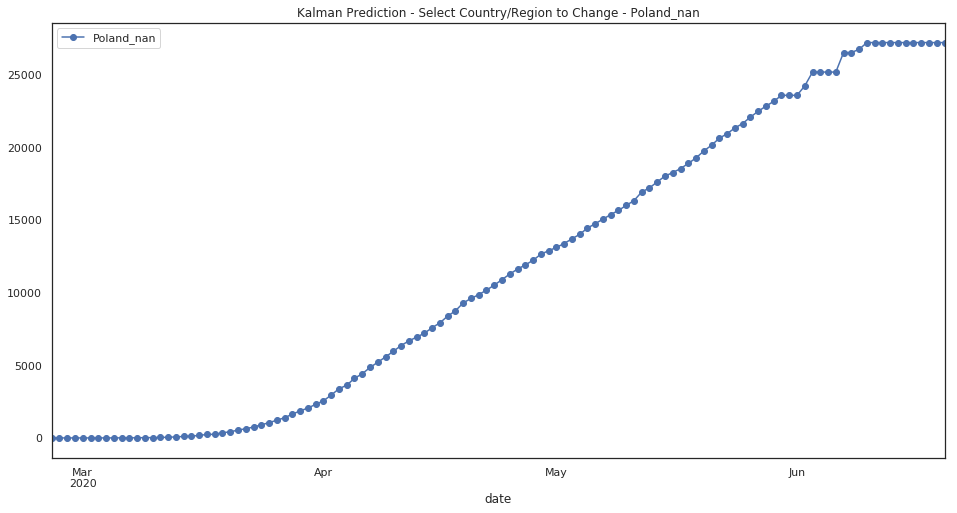

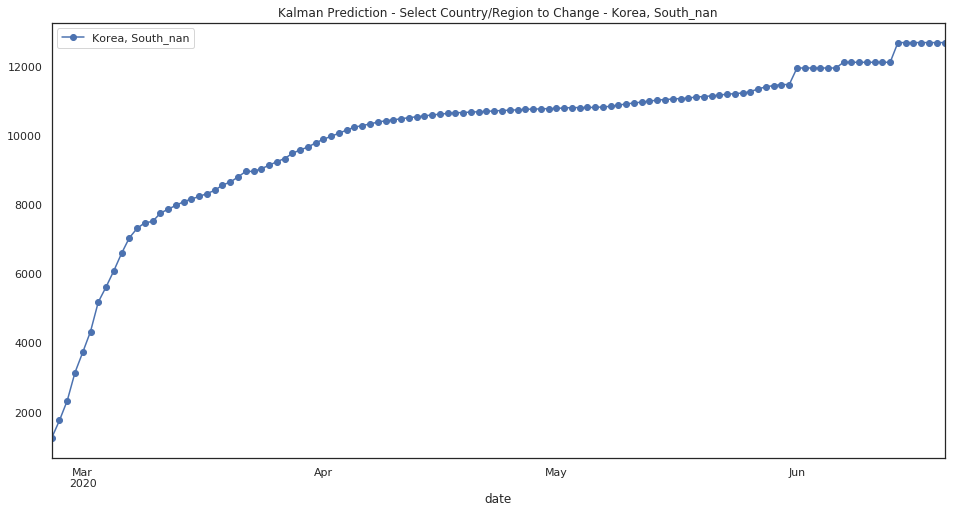

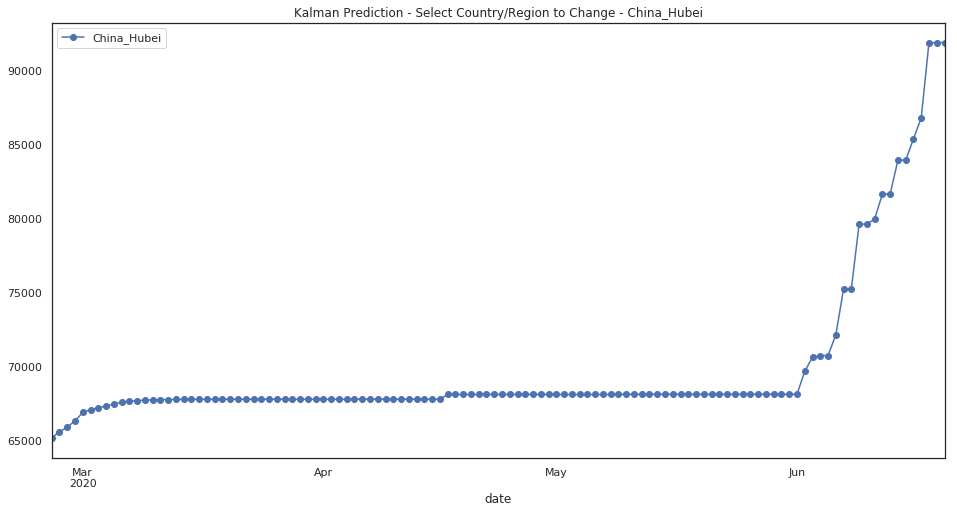

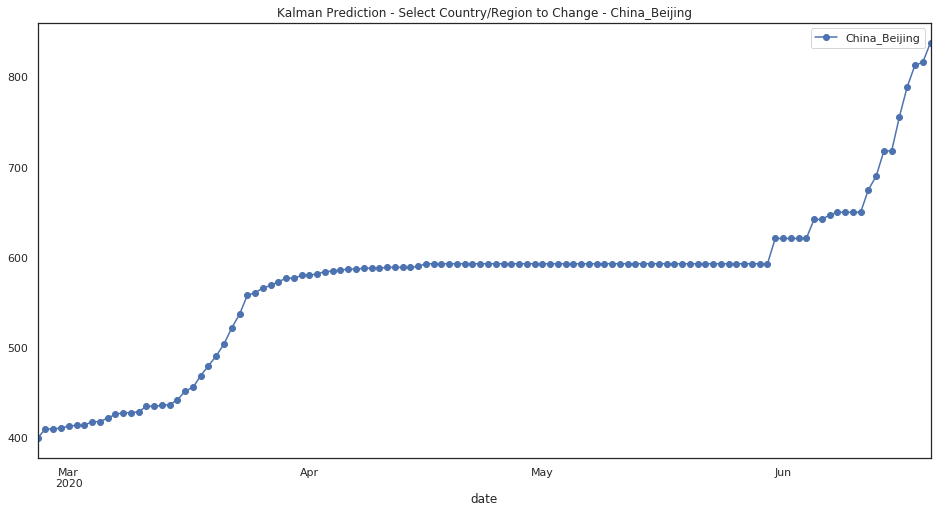

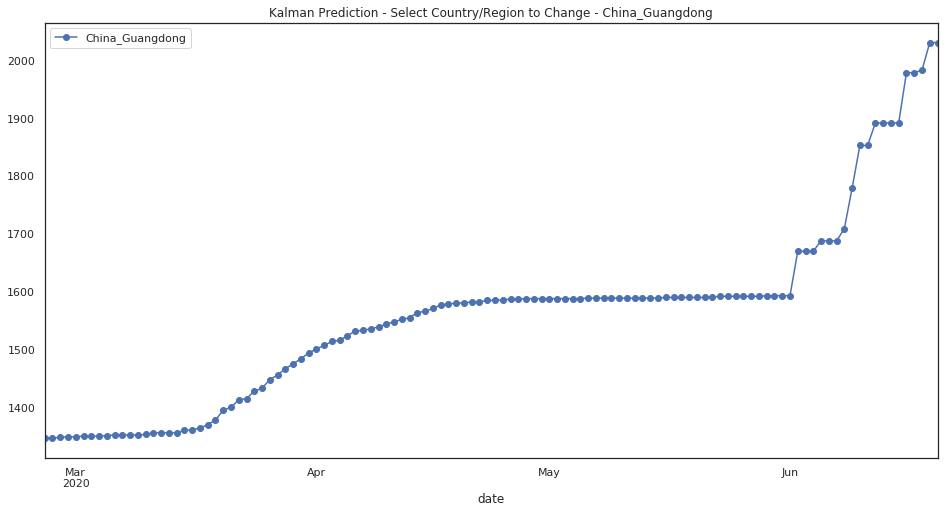

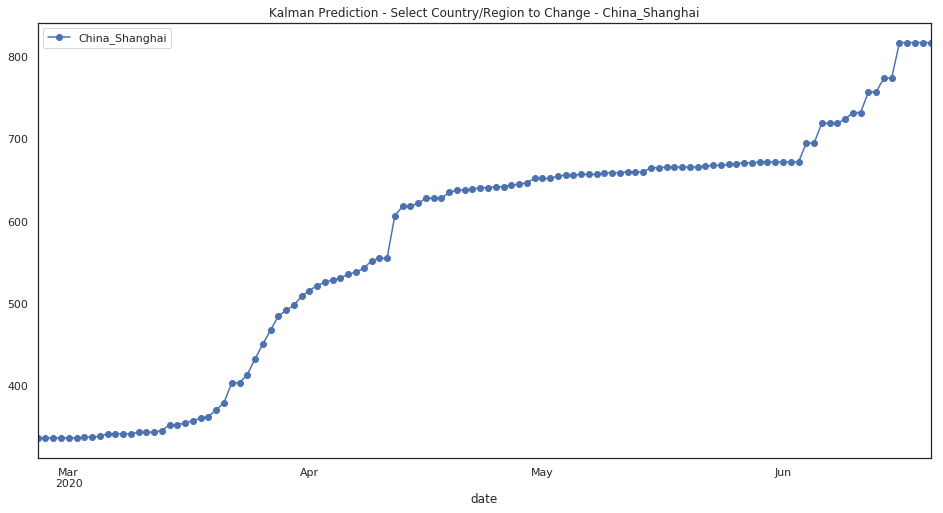

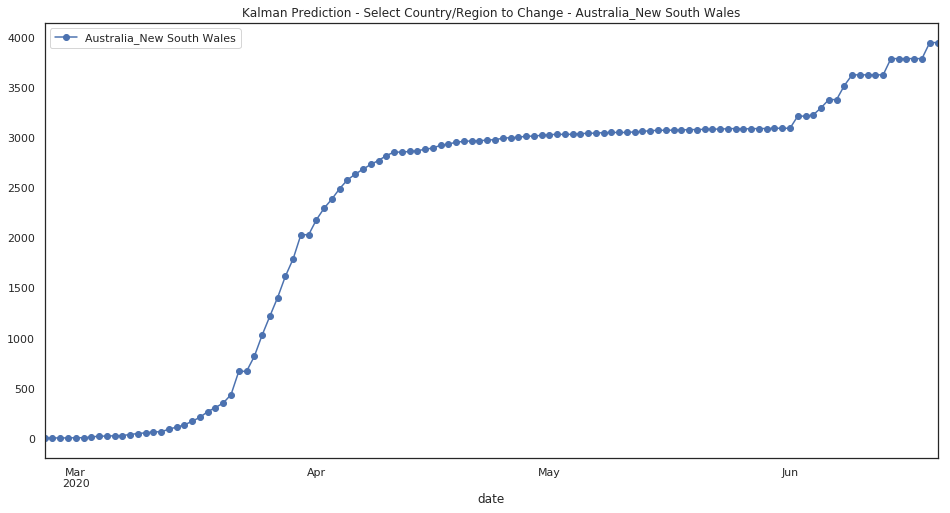

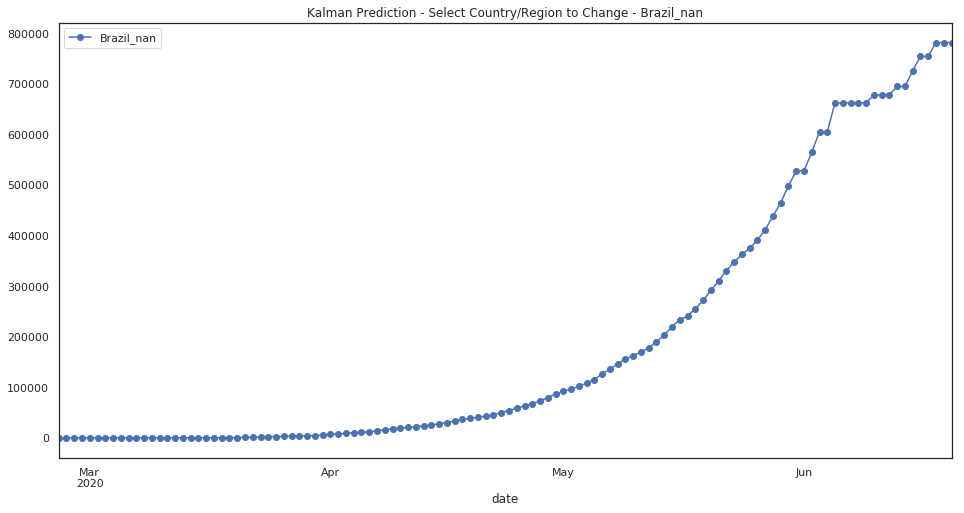

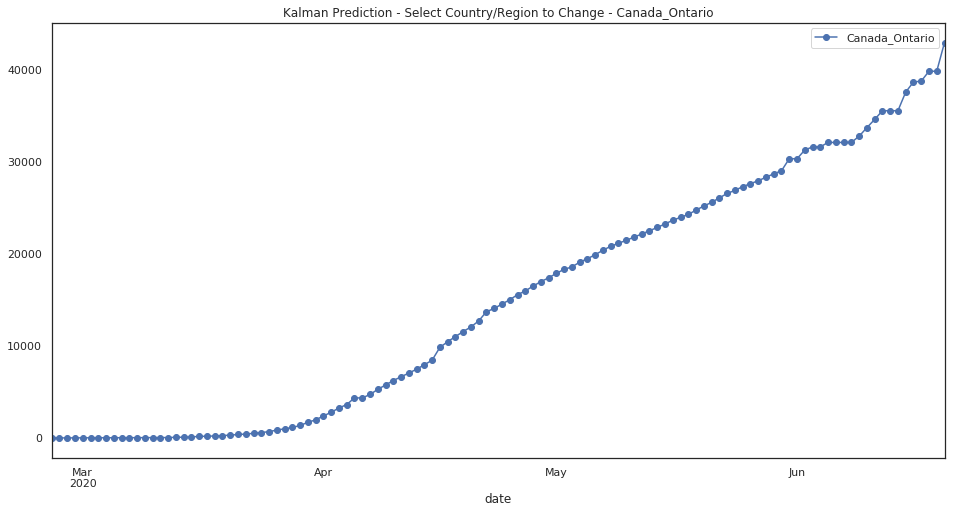

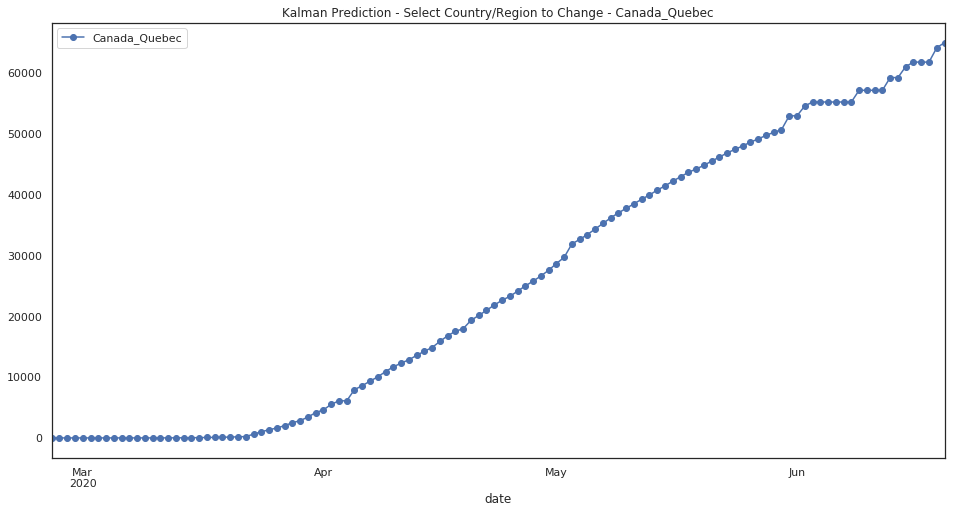

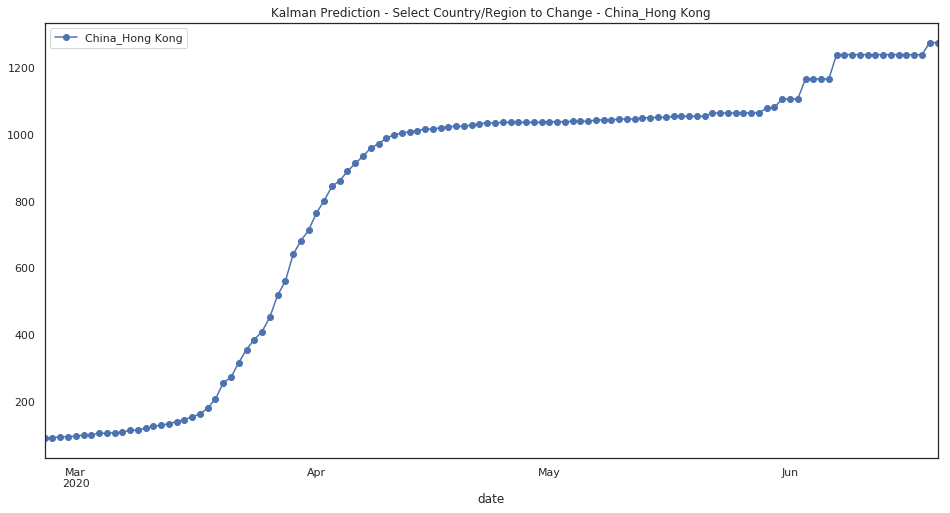

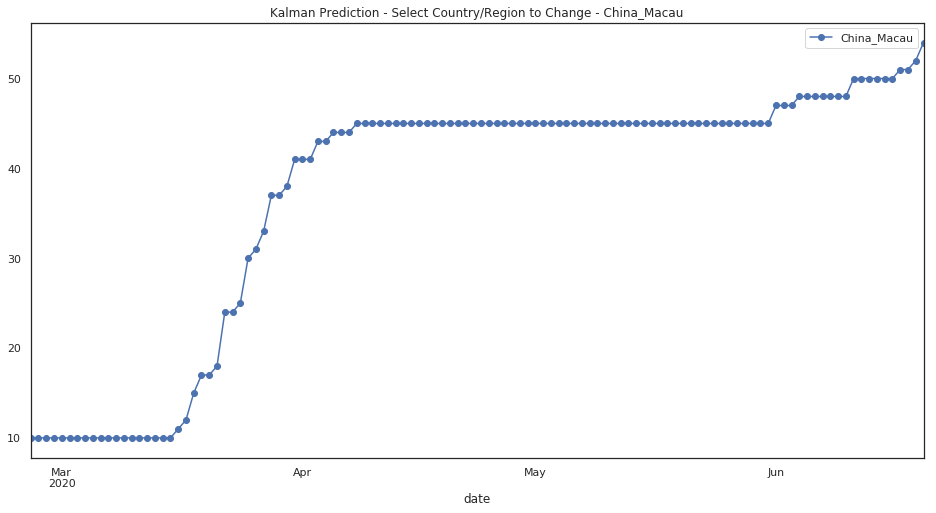

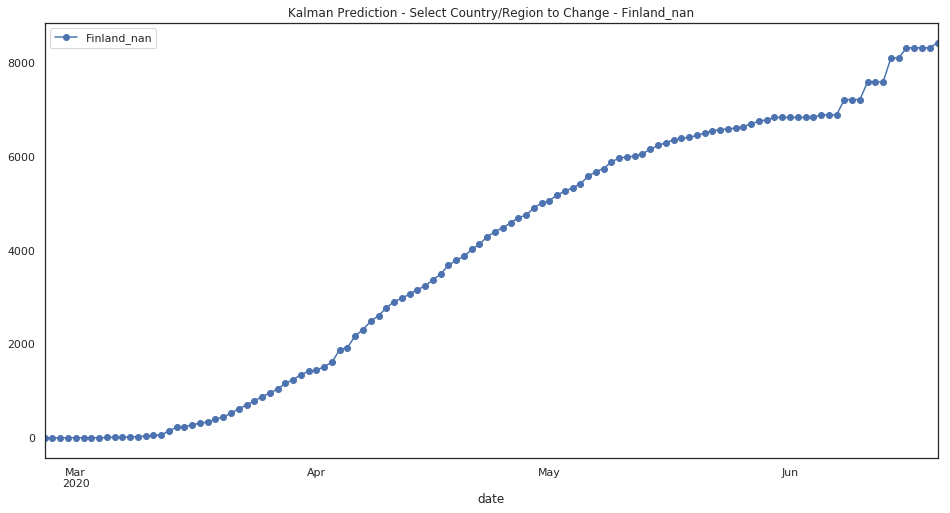

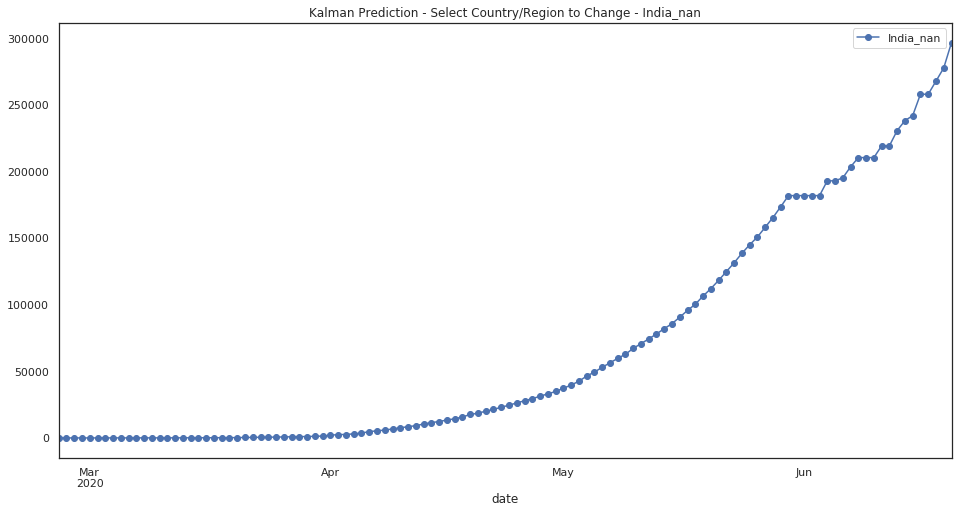

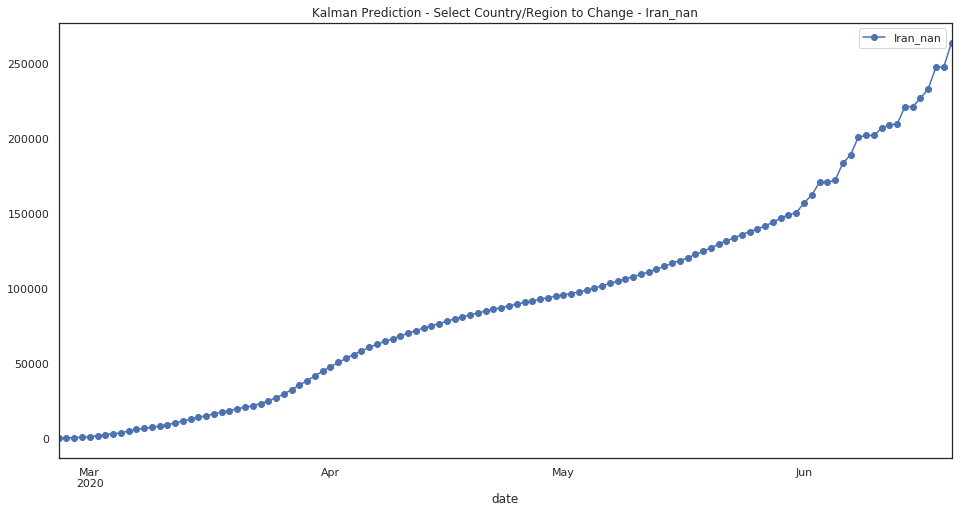

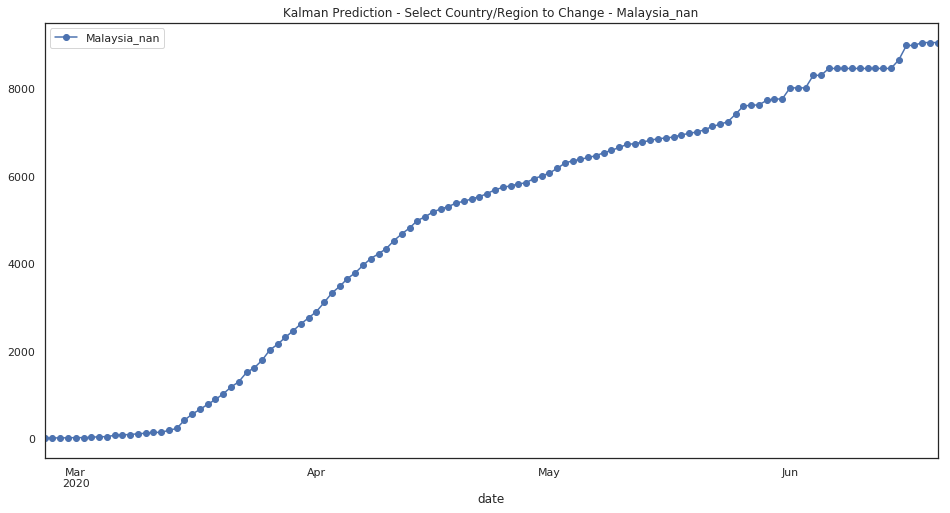

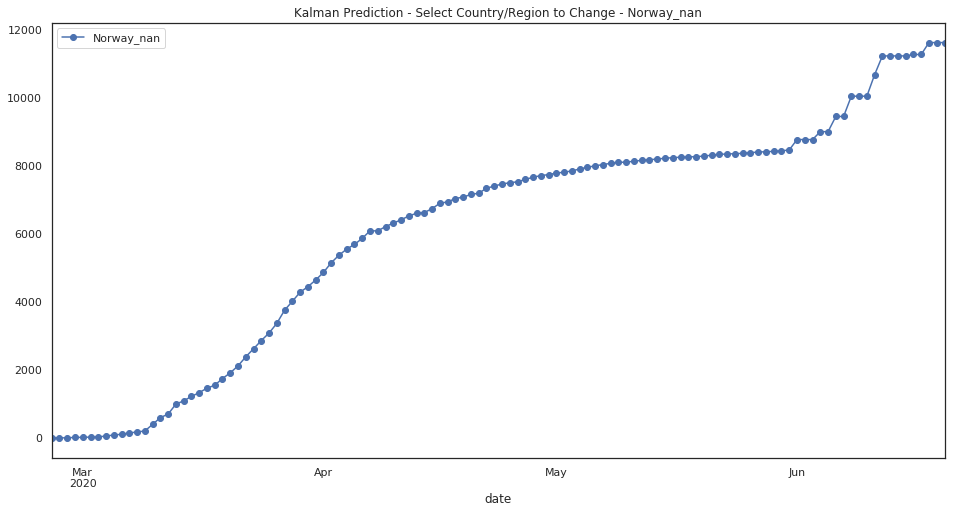

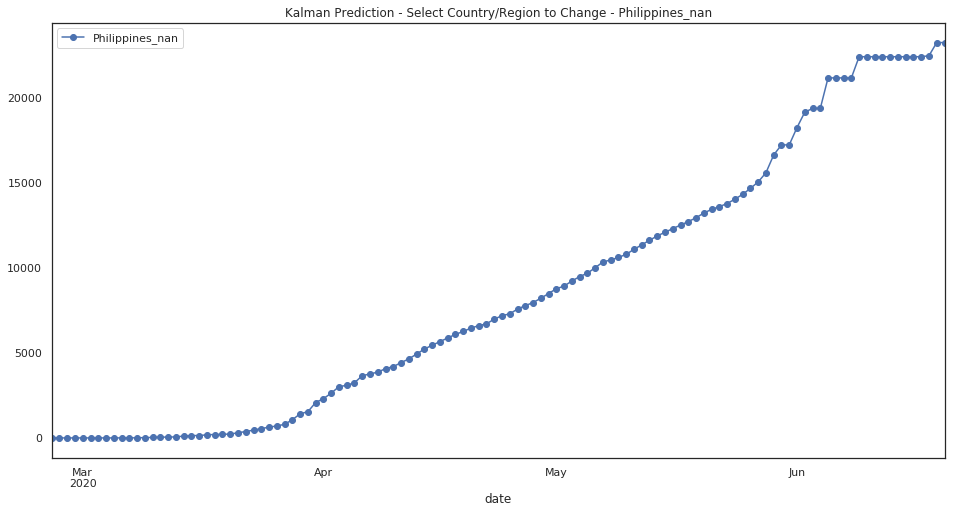

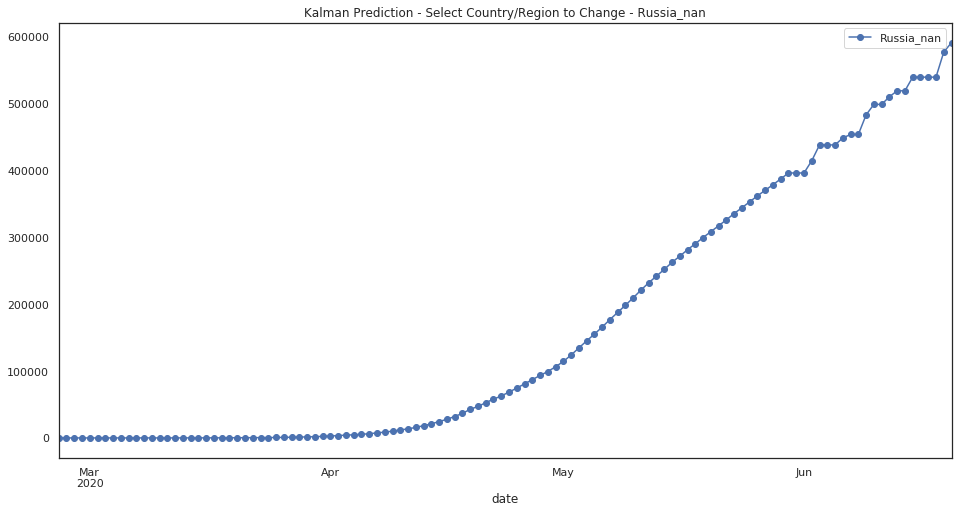

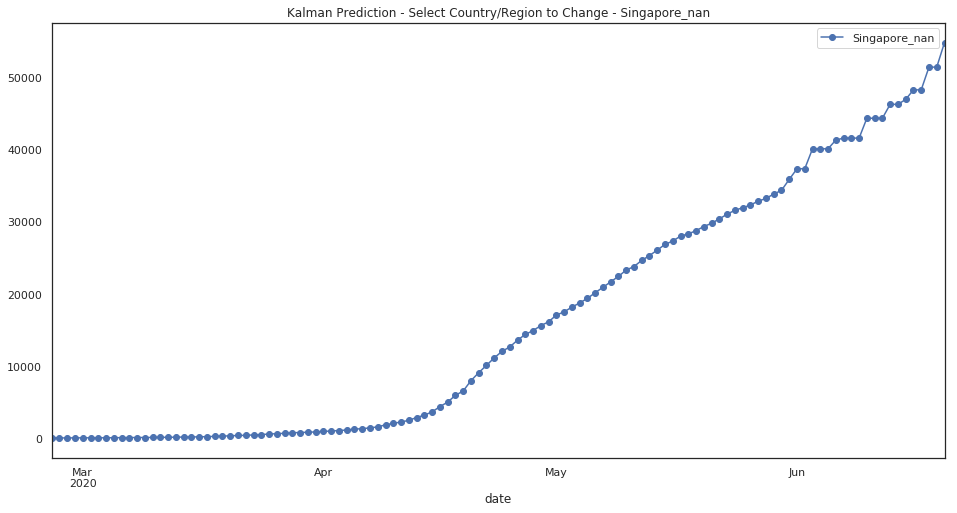

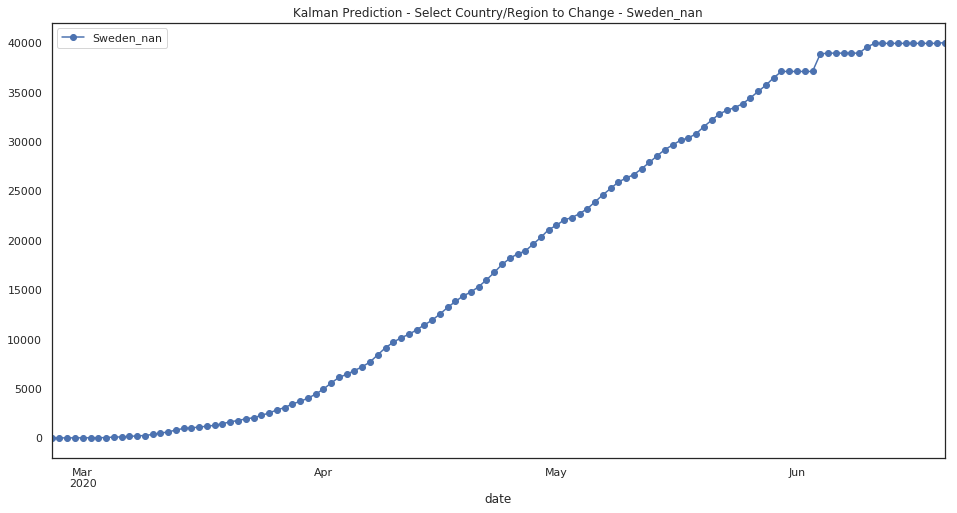

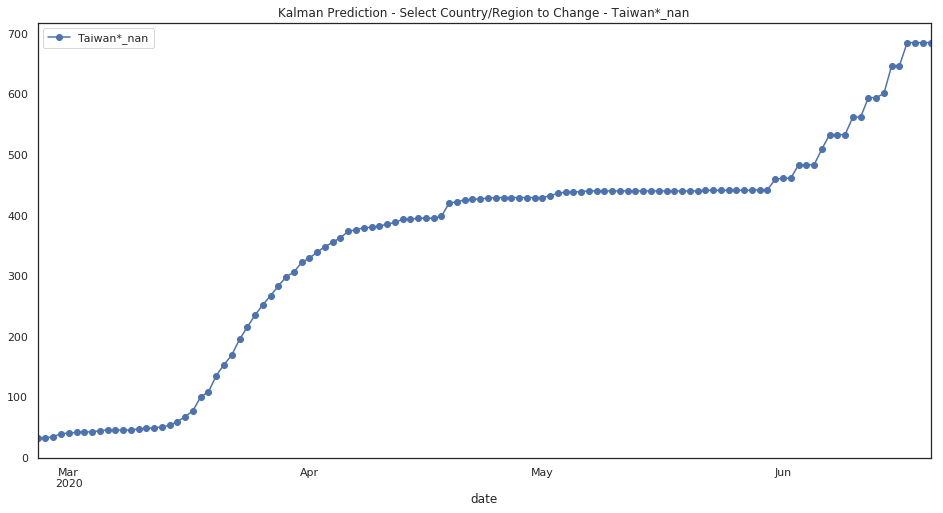

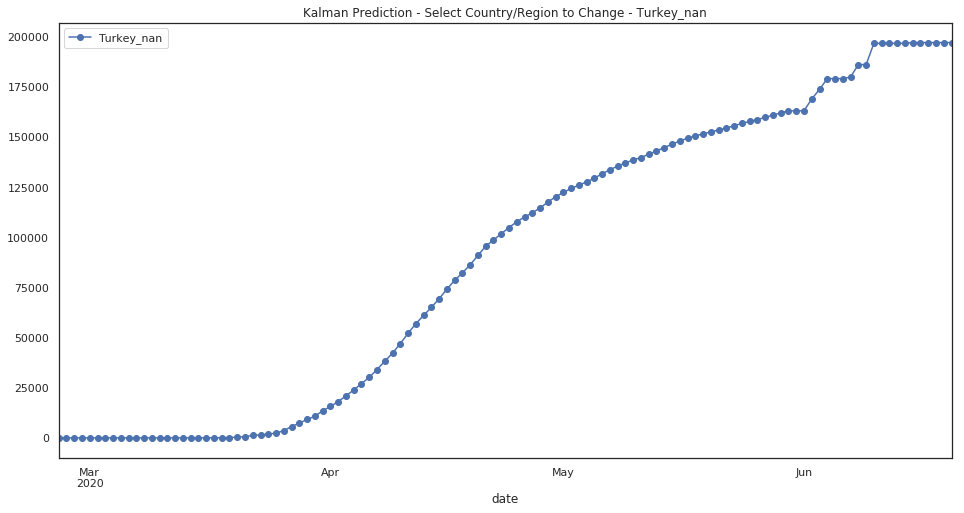

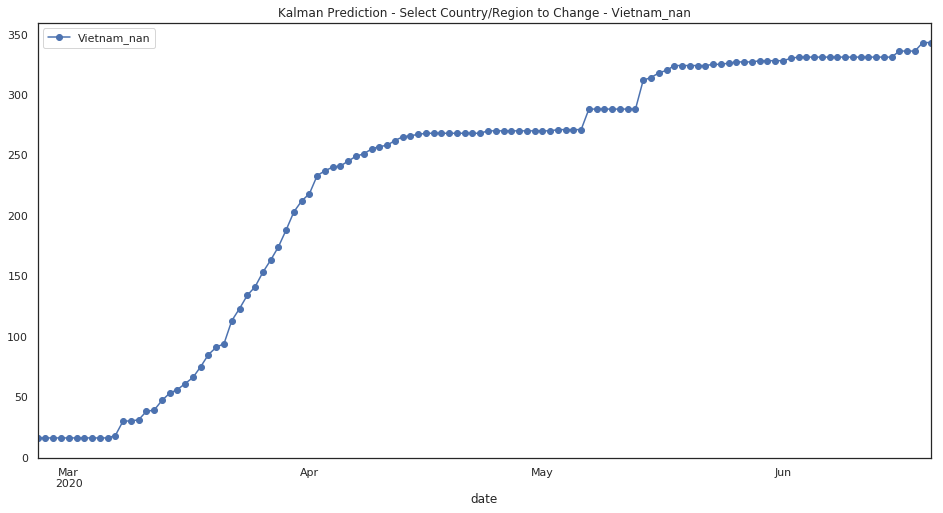

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-06-20 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN       2863593.0
Brazil_nan                                    NaN        781721.0
Russia_nan                                    NaN        591746.0
United Kingdom_nan                            NaN        359284.0
Spain_nan                                     NaN        325452.0
Italy_nan                                     NaN        309135.0
India_nan                                     NaN        296679.0
Iran_nan                                      NaN        263779.0
Germany_nan                                   NaN        244527.0
Peru_nan                                      NaN        220113.0
France_nan                                    NaN        211381.0
Turkey_nan                                    NaN        197125.0
Chile_nan                                     NaN        188303.0
Mexico_nan                                    NaN        148227.0
Saudi Arabia_nan                              NaN        106677.0
China_Hubei                                   NaN         91908.0
Pakistan_nan                                  NaN         76809.0
Bangladesh_nan                                NaN         76227.0
Belgium_nan                                   NaN         72438.0
Belarus_nan                                   NaN         67265.0
Qatar_nan                                     NaN         65279.0
Canada_Quebec                                 NaN         64977.0
South Africa_nan                              NaN         59953.0
Netherlands_nan                               NaN         57068.0
Singapore_nan                                 NaN         54830.0
Ecuador_nan                                   NaN         46726.0
United Arab Emirates_nan                      NaN         46258.0
Canada_Ontario                                NaN         42952.0
Portugal_nan                                  NaN         42146.0
Egypt_nan                                     NaN         41696.0
...                                           ...             ...
Gambia_nan                                    NaN            26.0
Grenada_nan                                   NaN            26.0
Denmark_Greenland                             NaN            25.0
Saint Kitts and Nevis_nan                     NaN            24.0
France_New Caledonia                          NaN            23.0
Netherlands_Curacao                           NaN            22.0
Belize_nan                                    NaN            22.0
Suriname_nan                                  NaN            20.0
Fiji_nan                                      NaN            20.0
Saint Lucia_nan                               NaN            19.0
Dominica_nan                                  NaN            19.0
Holy See_nan                                  NaN            16.0
Canada_Grand Princess                         NaN            15.0
United Kingdom_Falkland Islands (Malvinas)    NaN            14.0
United Kingdom_Turks and Caicos Islands       NaN            13.0
Seychelles_nan                                NaN            12.0
United Kingdom_Montserrat                     NaN            11.0
Canada_Yukon                                  NaN            11.0
Western Sahara_nan                            NaN             9.0
MS Zaandam_nan                                NaN             9.0
United Kingdom_British Virgin Islands         NaN             8.0
Papua New Guinea_nan                          NaN             8.0
France_Saint Barthelemy                       NaN             6.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN             6.0
Canada_Northwest Territories                  NaN             5.0
United Kingdom_Anguilla                       NaN             3.0
Lesotho_nan                                   NaN             2.0
Canada_Diamond Princess                       NaN             1.0
China_Tibet                                   NaN             1.0
France_Saint Pierre an

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [ ]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [ ]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [ ]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [ ]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-26             31.0         19.0         49.0         19.0   
2020-02-27             43.0         19.0         45.0         19.0   
2020-02-28             10.0         19.0         32.0         19.0   
2020-02-29             11.0         19.0         32.0         19.0   
2020-03-01             17.0         19.0         39.0         19.0   
2020-03-02             19.0         19.0         42.0         19.0   
2020-03-03             20.0         19.0         14.0         21.0   
2020-03-04             13.0         19.0         52.0          1.0   
2020-03-05             12.0         19.0         90.0          1.0   
2020-03-06             14.0         19.0         85.0          3.0   
2020-03-07             16.0         19.0         74.0          3.0   
2020-03-08             21.0         19.0         69.0          3.0   
2020-03-09              4.0         20.0         76.0          3.0   
2020-03-10             33.0         29.0         58.0          5.0   
2020-03-11             40.0         10.0         57.0          5.0   
2020-03-12             31.0         16.0         60.0          5.0   
2020-03-13             39.0         66.0         67.0          5.0   
2020-03-14             41.0         47.0         77.0          5.0   
2020-03-15             45.0         50.0         93.0          5.0   
2020-03-16             46.0         52.0        103.0          6.0   
2020-03-17             55.0         97.0        107.0         22.0   
2020-03-18             51.0         68.0        118.0         39.0   
2020-03-19             47.0         72.0        137.0        254.0   
2020-03-20             48.0         75.0        141.0        252.0   
2020-03-21             49.0         82.0        174.0        207.0   
2020-03-22             60.0         94.0        270.0        244.0   
2020-03-23             69.0        113.0        318.0        308.0   
2020-03-24             93.0        134.0        321.0        259.0   
2020-03-25            131.0        159.0        358.0        202.0   
2020-03-26            125.0        188.0        418.0        226.0   
...                     ...          ...          ...          ...   
2020-05-23          10099.0        994.0       8198.0        762.0   
2020-05-24          10927.0       1000.0       8397.0        762.0   
2020-05-25          11269.0       1008.0       8592.0        762.0   
2020-05-26          11900.0       1026.0       8790.0        763.0   
2020-05-27          12591.0       1065.0       8951.0        763.0   
2020-05-28          13128.0       1085.0       9059.0        763.0   
2020-05-29          13689.0       1112.0       9181.0        763.0   
2020-05-30          14546.0       1130.0       9318.0        764.0   
2020-05-31          14953.0       1166.0       9707.0        764.0   
2020-06-01          14525.0       1189.0      10089.0        775.0   
2020-06-02          14525.0       1163.0       9709.0        775.0   
2020-06-03          14648.0       1195.0       9709.0        775.0   
2020-06-04          16055.0       1261.0       9709.0        775.0   
2020-06-05          16613.0       1244.0       9709.0        775.0   
2020-06-06          15953.0       1301.0       9713.0        775.0   
2020-06-07          16184.0       1268.0       9730.0        775.0   
2020-06-08          16685.0       1268.0      10167.0        775.0   
2020-06-09          16433.0       1268.0      10698.0        775.0   
2020-06-10          16746.0       1279.0      10595.0        775.0   
2020-06-11          17395.0       1359.0      11139.0        775.0   
2020-06-12          18730.0       1431.0      10656.0        775.0   
2020-06-13          17761.0       1472.0      10775.0        811.0   
2020-06-14          18456.0       1496.0      10976.0        811.0   
2020-06-15          19064.0       1511.0      10837.0        811.0   
2020-06-16

In [ ]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
#pred=pred[:-1]

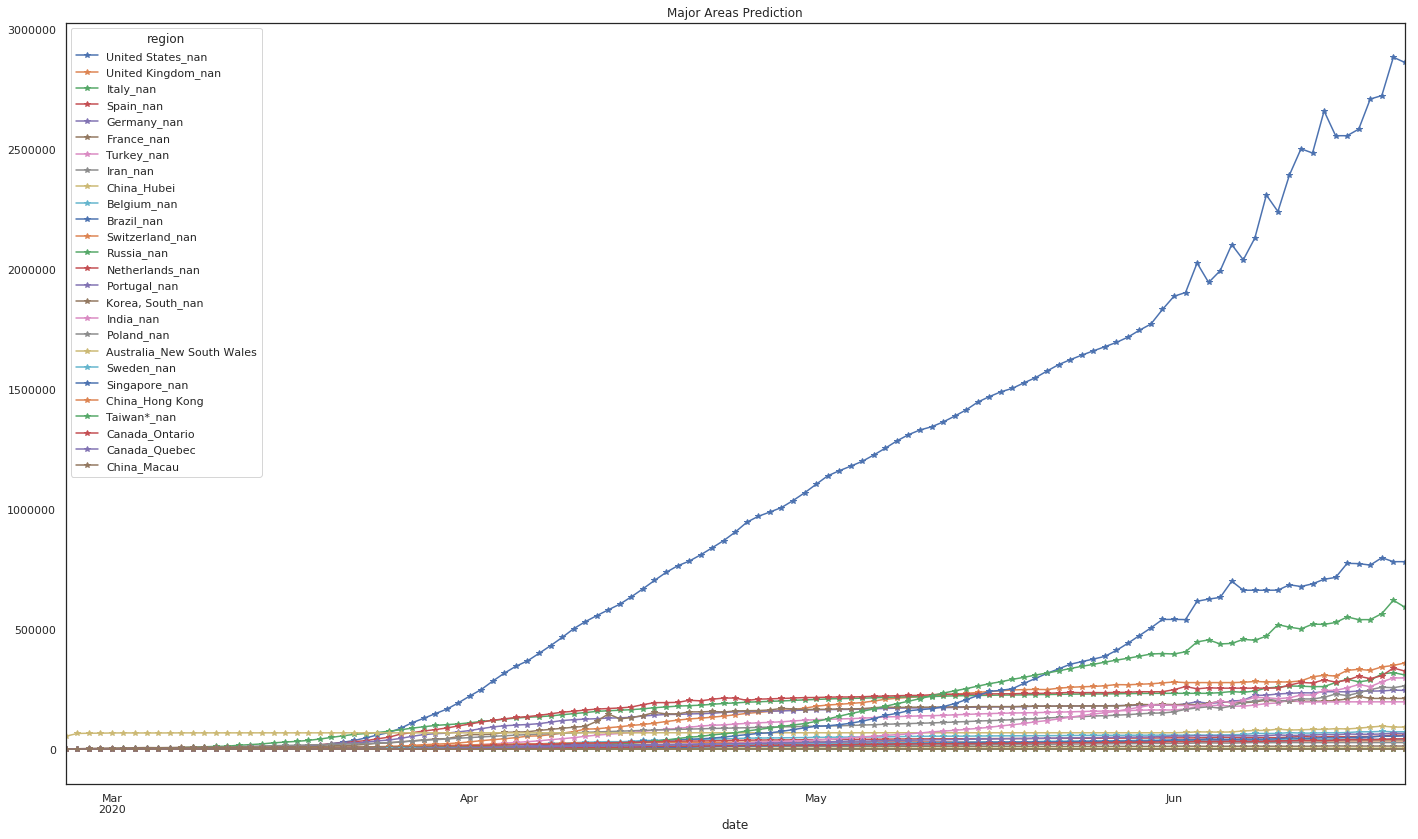

In [ ]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',
        'Germany_nan',
        'France_nan',
        'Turkey_nan',
        'Iran_nan',
        'China_Hubei',
        'Belgium_nan',
        'Brazil_nan',
        'Switzerland_nan',
        'Russia_nan',
        'Netherlands_nan',
        'Portugal_nan',
        'Korea, South_nan',
        'India_nan',
        'Poland_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Canada_Ontario',
        'Canada_Quebec',
        'China_Macau'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p[:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

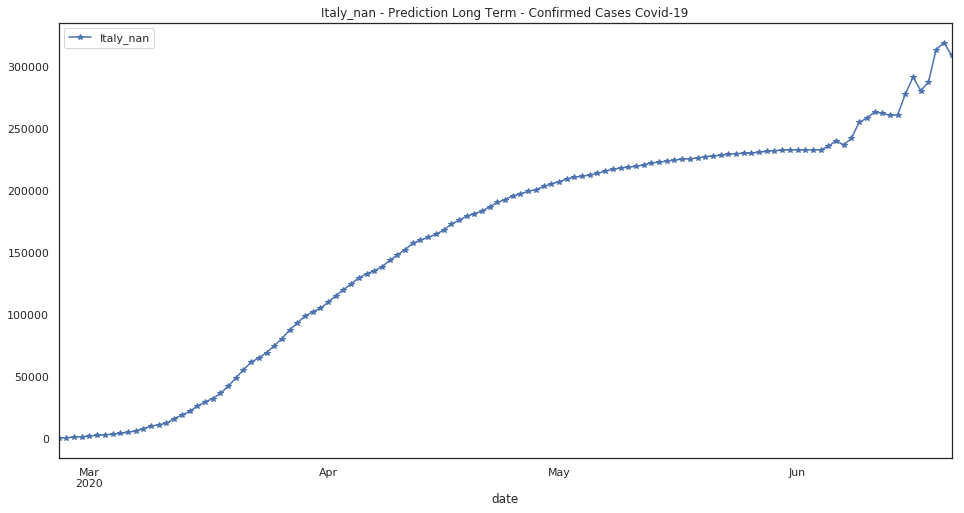

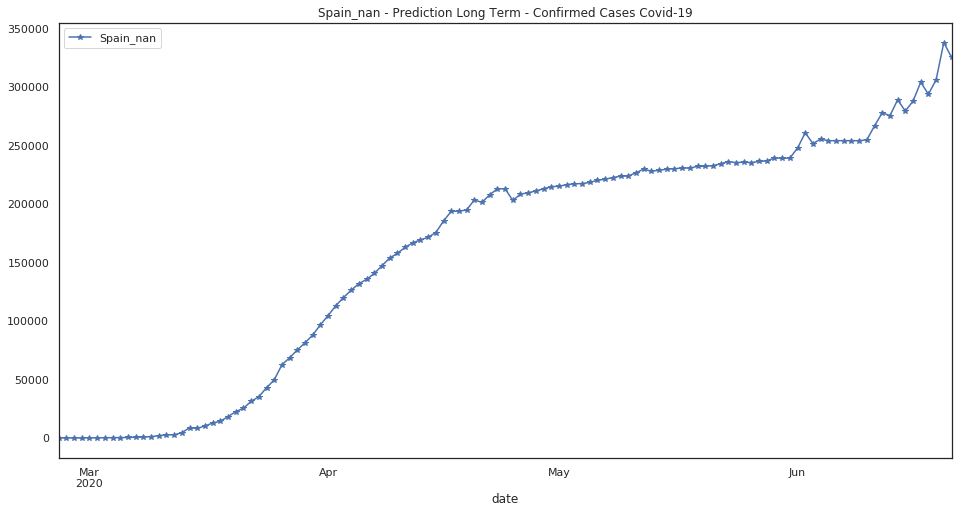

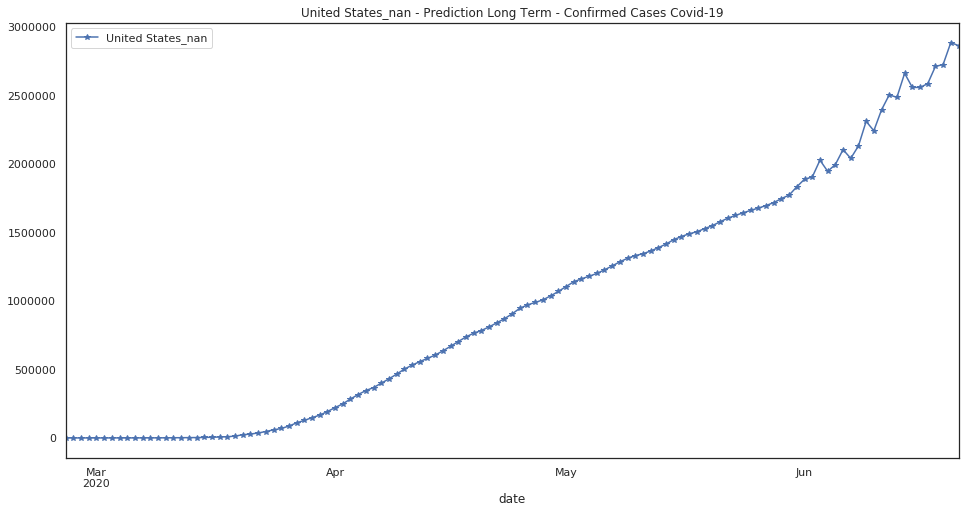

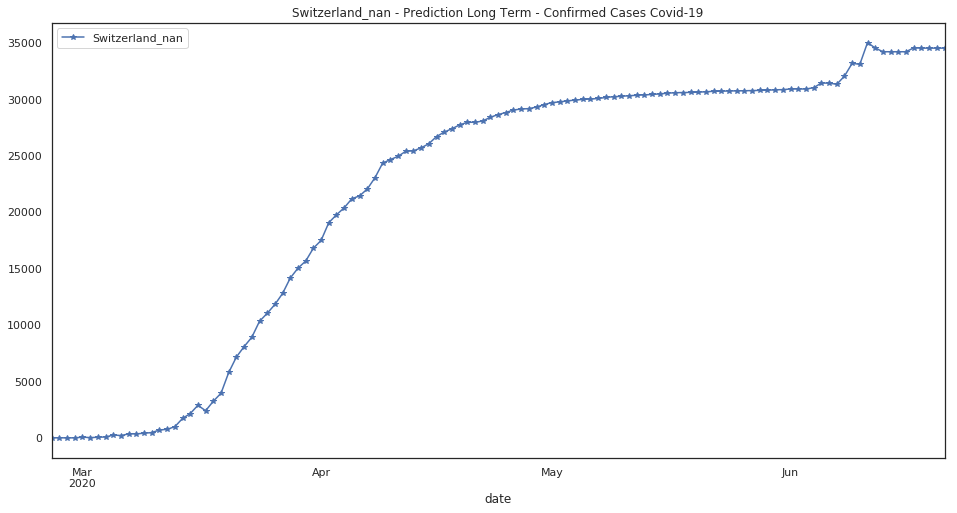

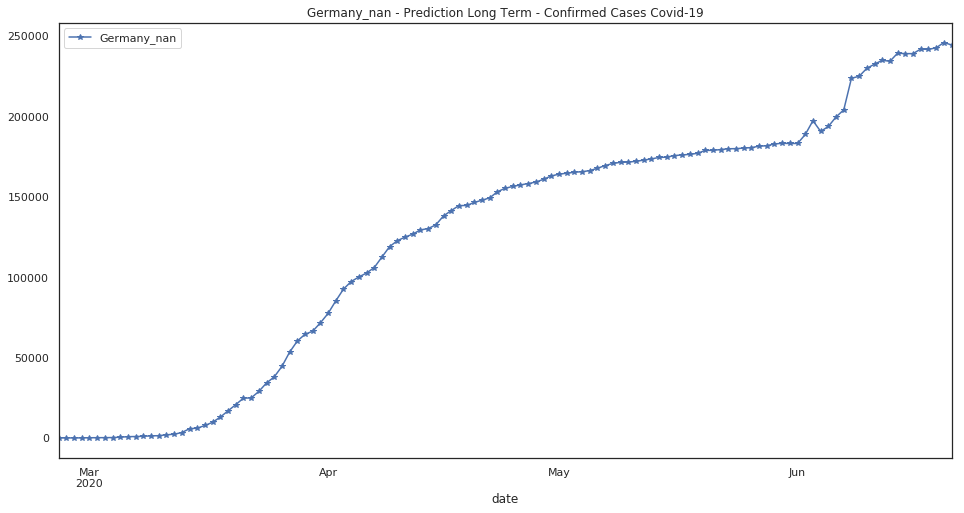

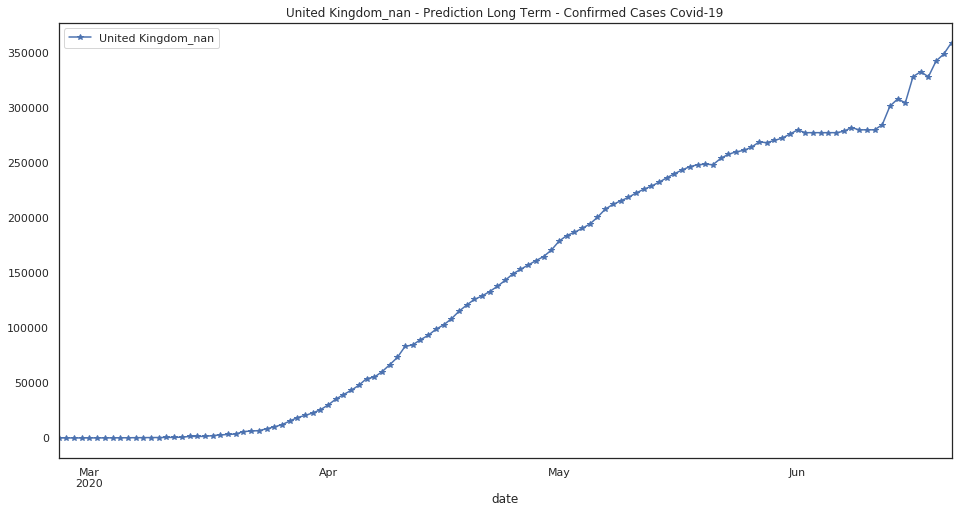

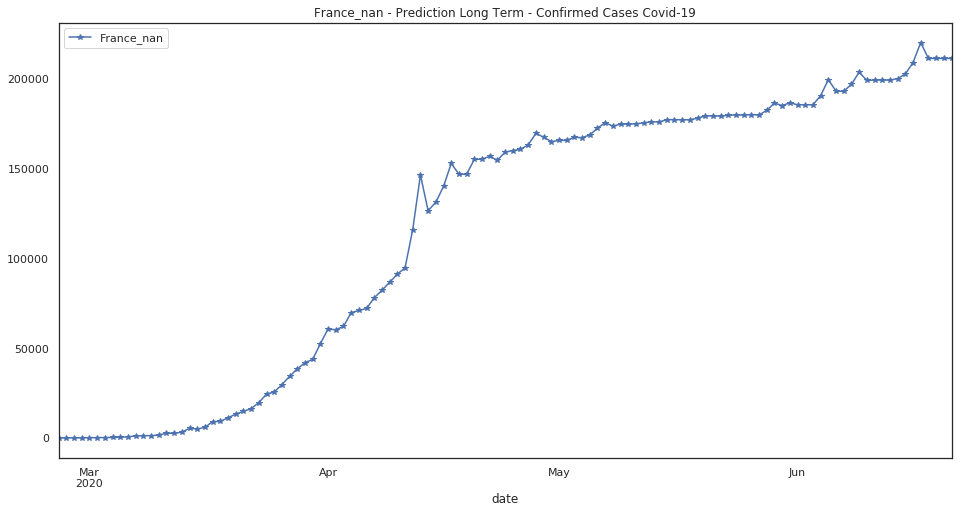

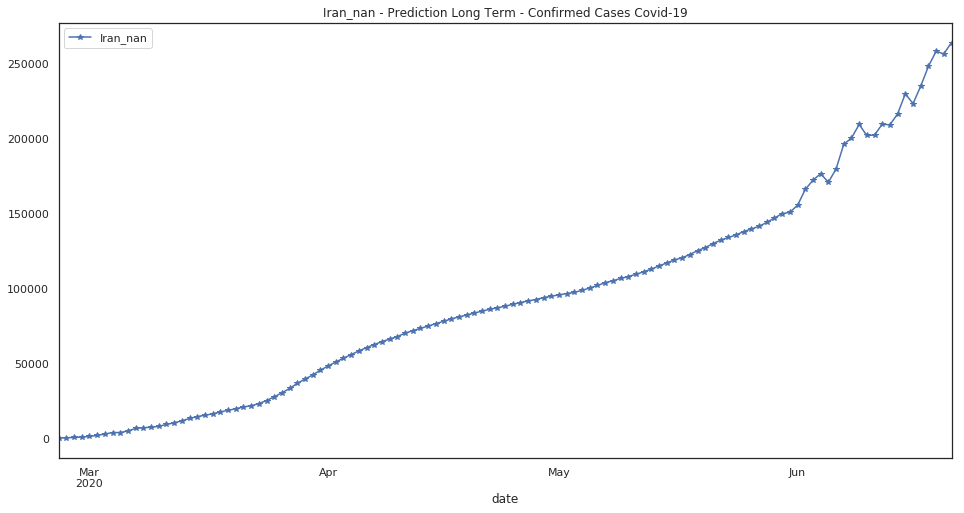

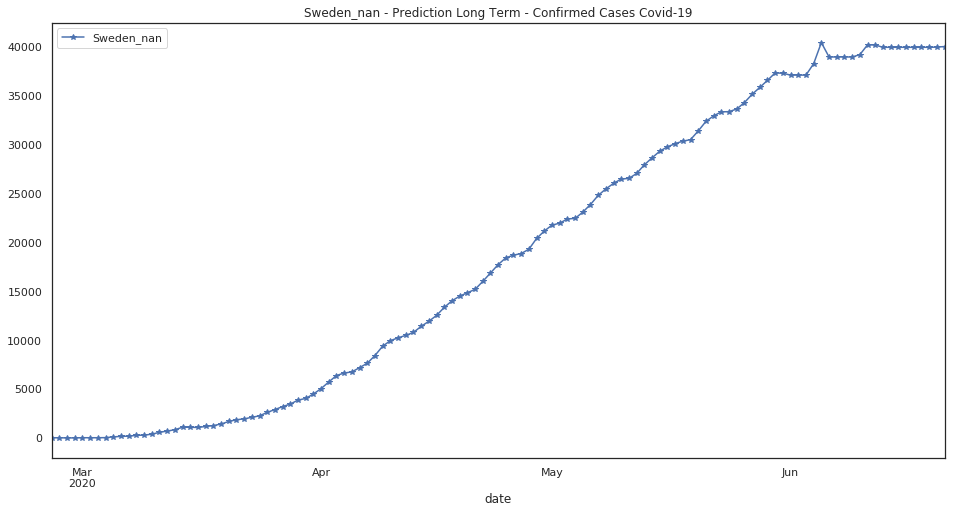

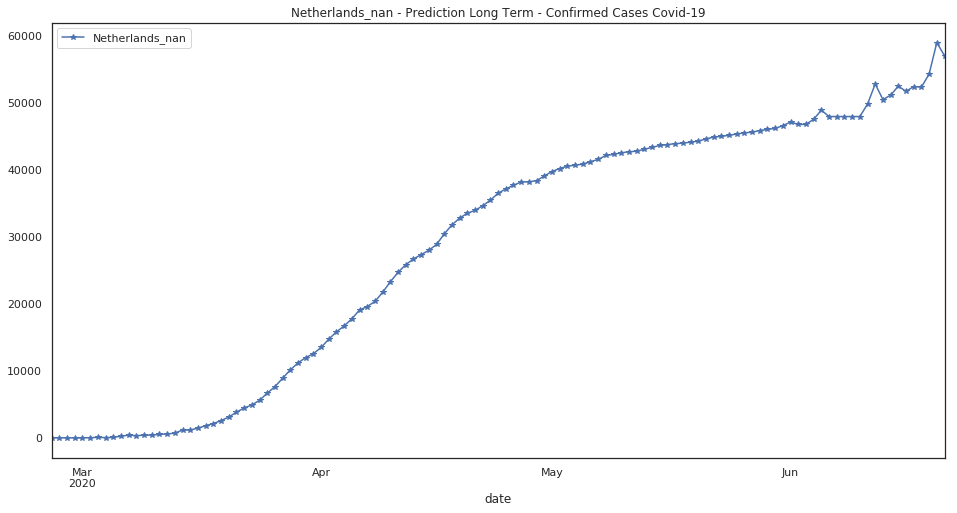

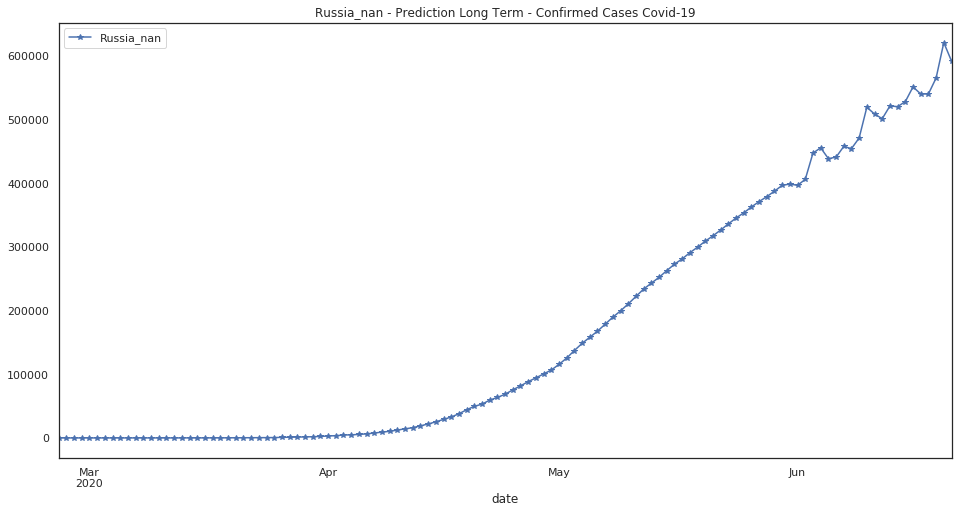

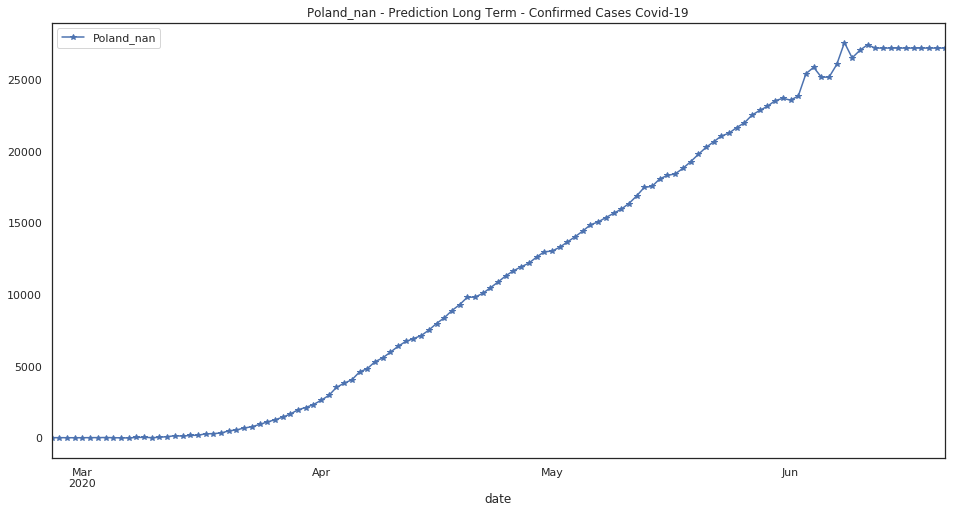

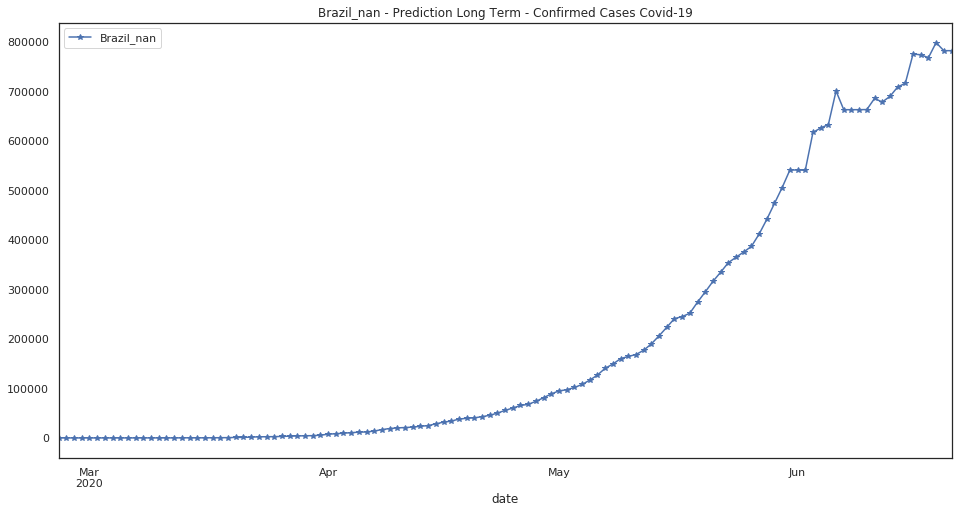

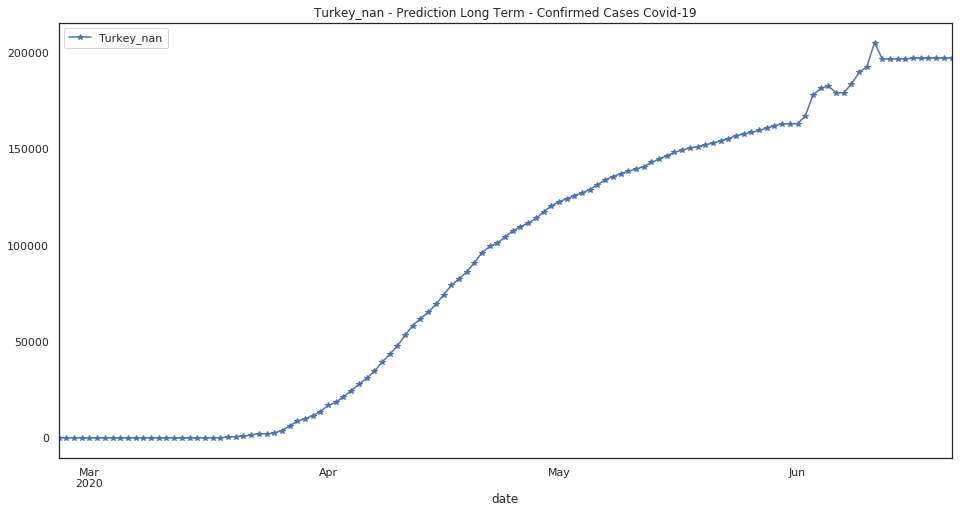

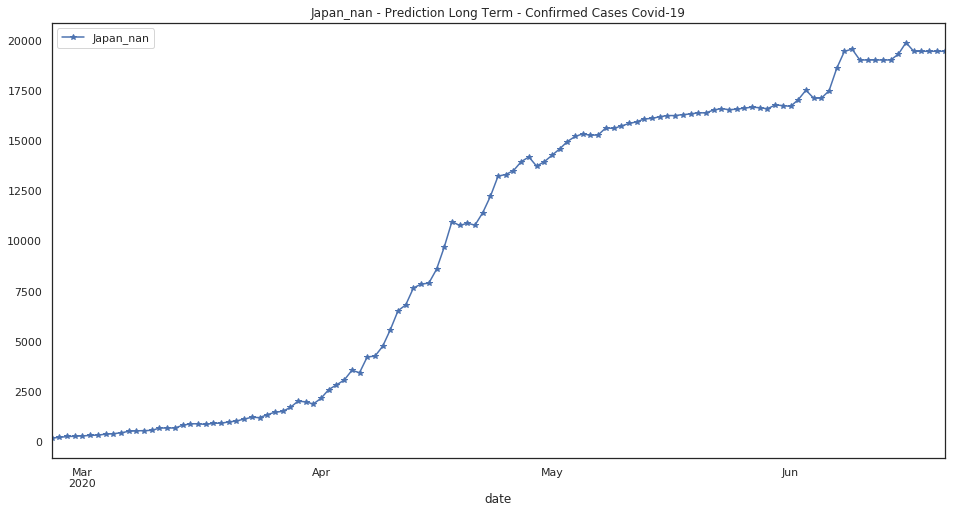

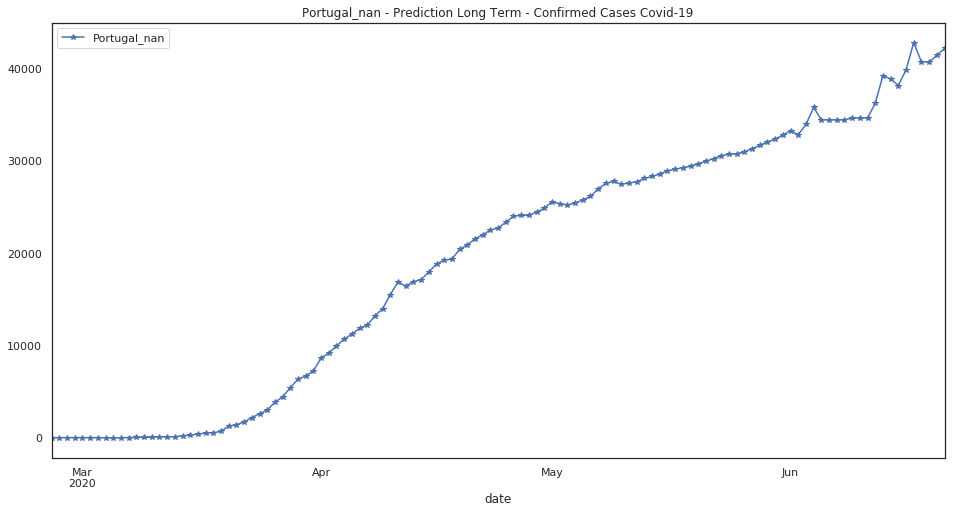

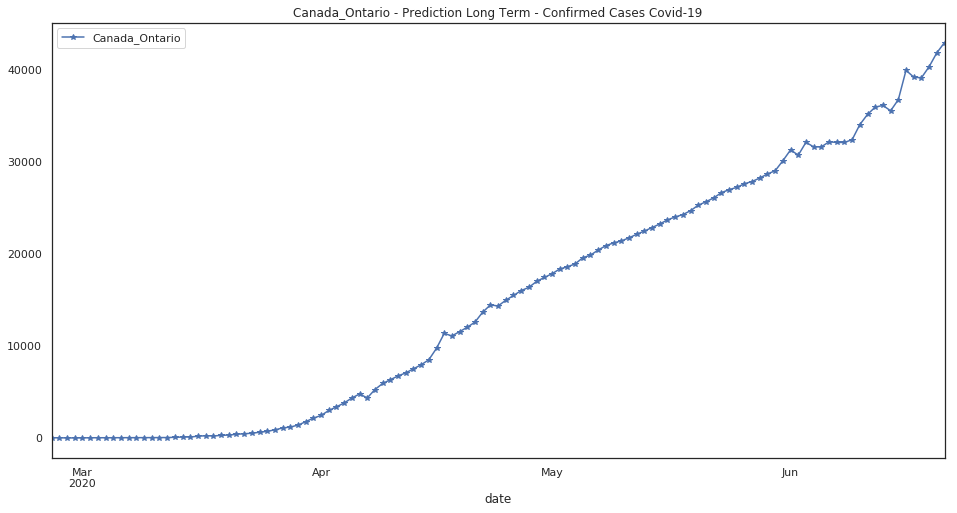

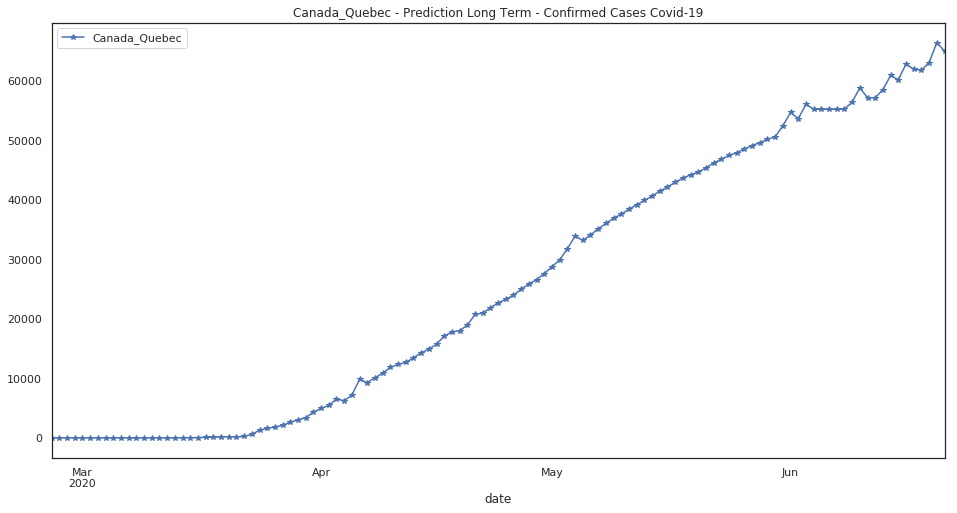

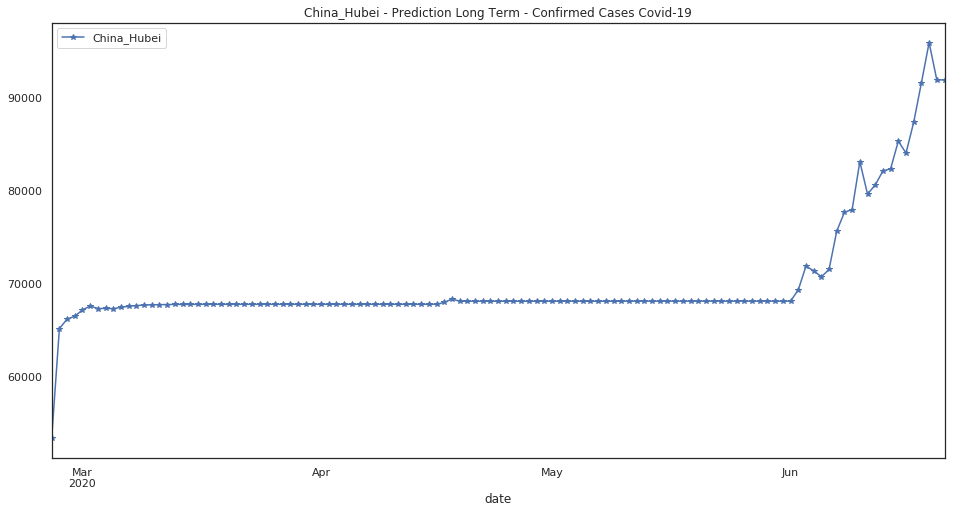

In [ ]:
#
rgsx=['Italy_nan','Spain_nan','United States_nan','Switzerland_nan',
      'Germany_nan','United Kingdom_nan','France_nan','Iran_nan',
      'Sweden_nan','Netherlands_nan','Russia_nan','Poland_nan',
      'Brazil_nan','Turkey_nan','Japan_nan',
      'Portugal_nan','Canada_Ontario','Canada_Quebec','China_Hubei']
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

In [ ]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [ ]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [ ]:
p[45:]

In [ ]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [ ]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [ ]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [ ]:
heatmap_m[:]

In [ ]:
#!pip install folium
import folium
import re

lat=46.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]], ((heatmap_m[heatmap_m.columns[-3]]-heatmap_m[heatmap_m.columns[-4]])+(heatmap_m[heatmap_m.columns[-2]]-heatmap_m[heatmap_m.columns[-3]])+(heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[-2]]))/3 ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' LdayGrowth='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [ ]:
#
region_m2=region + ['Andorra_nan','Monaco_nan','San Marino_nan','Ireland_nan','Slovenia_nan','Slovakia_nan','Czechia_nan',
                    'Hungary_nan','Ukraine_nan','Croatia_nan','Finland_nan','Norway_nan','Estonia_nan','Denmark_nan','Greece_nan',
                    'Chile_nan','Argentina_nan','Mexico_nan','Ecuador_nan','Peru_nan','Colombia_nan','Costa Rica_nan',
                    'South Africa_nan','Morocco_nan','Algeria_nan','Saudi Arabia_nan','Israel_nan','Japan_nan',
                    'Singapore_nan','Canada_British Columbia']
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

In [ ]:
import folium
import re

lat=46.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], ((heatmap_m2[heatmap_m2.columns[-3]]-heatmap_m2[heatmap_m2.columns[-4]])+(heatmap_m2[heatmap_m2.columns[-2]]-heatmap_m2[heatmap_m2.columns[-3]])+(heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[-2]]))/3 ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' LdayGrowth='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [ ]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [ ]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March and now April!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

In [ ]:
exit()